# Prepare for data

In [1]:
import pandas as pd
import statsmodels.api as sm
import itertools
import time

df_ins = pd.read_excel('./data/insuranceContent/ins_tcfdesg_feature.xlsx')
df_bank = pd.read_excel('./data/bankContent/bank_regression.xlsx')

In [2]:
df_bank_tcfd = df_bank[df_bank['tcfd'] == 1]
df_bank_tcfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Filename                       31 non-null     object 
 1   Text_cleaned                   31 non-null     object 
 2   Words                          31 non-null     object 
 3   association_word               31 non-null     object 
 4   top_association_word           31 non-null     object 
 5   Words_top100                   31 non-null     object 
 6   vectors_Wordsassociation       31 non-null     float64
 7   vectors_Wordsassociationtop10  31 non-null     float64
 8   vectors_Wordstop100            31 non-null     float64
 9   FilenameTempCN                 31 non-null     object 
 10  corpName                       31 non-null     object 
 11  tcfd                           31 non-null     int64  
 12  esg                            31 non-null     int64

In [3]:
df_life = df_ins[(df_ins['Life_Ins'] == 1)]
df_life_tcfd = df_ins[(df_ins['Life_Ins'] == 1) & (df_ins['tcfd'] == 1)]
df_life

,Filename,Year,Life_Ins,Property_Ins,Company_Name,Company_Name_CN_brief,Company_Name_CN,Score_external,tcfd,esg,...,金控母公司名稱,金控母公司是公股,TCFD_會計師確信,TCFD_BSI查核,溫室氣體驗證,有任第三方驗證,Score_internal,Rank,vectors_Words,vectors_Wordstop500
0,2022_l_chinalife_tcfd,2022,1,0,chinalife,中國人壽,中國人壽保險股份有限公司,76.650000,1,0,...,開發金,0,0,0,0,0,49.686599,5,5.449290,2.187549
1,2022_l_allianz_tcfd,2022,1,0,allianz,安聯人壽,安聯人壽保險股份有限公司,76.350000,1,0,...,無,0,0,0,0,0,42.131748,31,5.424790,2.197622
2,2022_l_twfhclife_tcfd,2022,1,0,twfhclife,台銀人壽,臺銀人壽保險股份有限公司,76.500000,1,0,...,臺灣金,1,0,0,0,0,60.907873,2,5.599635,2.178689
3,2022_l_pcalife_tcfd,2022,1,0,pcalife,保誠人壽,保誠人壽保險股份有限公司,74.375000,1,0,...,無,0,0,0,0,0,40.825938,15,4.922214,2.191964
4,2022_l_chubbp_tcfd,2022,1,0,chubb,安達國際人壽,安達國際人壽保險股份有限公司,66.916667,1,0,...,無,0,0,0,0,0,18.873457,40,5.738282,2.192790
5,2022_l_hontai_tcfd,2022,1,0,hontai,宏泰人壽,宏泰人壽保險股份有限公司,74.916667,1,0,...,無,0,0,0,0,0,45.592150,10,5.877884,2.165887
6,2022_l_CTBC Holding_tcfd,2022,1,0,CTBC Holding,台灣人壽,台灣人壽保險股份有限公司,83.850000,1,0,...,中信金,0,1,0,0,1,40.226942,19,5.487936,2.171859
7,2022_l_Taishin Holdings_tcfd,2022,1,0,Taishin Holdings,台新人壽,台新人壽保險股份有限公司,79.000000,1,0,...,台新金,0,0,1,0,1,36.584891,25,5.212508,2.165388
8,2022_l_Firstfinancial_tcfd,2022,1,0,Firstfinancial,第一金人壽,第一金人壽保險股份有限公司,80.916667,1,0,...,第一金,1,0,1,0,1,35.951499,26,5.577302,2.218289
9,2022_l_shinkong_esg,2022,1,0,shinkong,新光人壽,新光人壽保險股份有限公司,84.000000,0,1,...,新光金,0,0,1,0,1,43.314120,13,5.618822,2.174559


In [7]:
df_property = df_ins[(df_ins['Property_Ins'] == 1)]
df_property_tcfd = df_ins[(df_ins['Property_Ins'] == 1) & (df_ins['tcfd'] == 1)]
df_property

,Filename,Year,Life_Ins,Property_Ins,Company_Name,Company_Name_CN_brief,Company_Name_CN,Score_external,tcfd,esg,...,金控母公司名稱,金控母公司是公股,TCFD_會計師確信,TCFD_BSI查核,溫室氣體驗證,有任第三方驗證,Score_internal,Rank,vectors_Words,vectors_Wordstop500
21,2022_p_south-china_tcfd,2022,0,1,south-china,華南產險,華南產物保險股份有限公司,88.964286,1,0,...,華南金,1,0,0,0,0,57.461256,3,5.615370,2.155071
22,2022_p_hotai_tcfd,2022,0,1,hotai,和泰產險,和泰產物保險股份有限公司,75.857143,1,0,...,無,0,0,0,0,0,25.959700,33,5.815554,2.178701
23,2022_p_fubon_tcfd,2022,0,1,fubon,富邦產險,富邦產物保險股份有限公司,89.291667,1,0,...,富邦金,0,0,0,0,0,40.067344,21,5.276626,2.172286
24,2022_p_CTBC Holding_tcfd,2022,0,1,CTBC Holding,中國信託產險,中國信託產物保險股份有限公司,83.208333,1,0,...,中信金,0,1,0,0,1,39.164784,19,5.487936,2.171859
25,2022_p_BNP_tcfd,2022,0,1,BNP,巴黎產險,法商法國巴黎產物保險股份有限公司台灣分公司,83.892857,1,0,...,無,0,0,0,0,0,26.280731,32,5.643857,2.166092
26,2022_p_MSIG_esg,2022,0,1,MSIG,明台產險,明台產物保險股份有限公司,75.107143,0,1,...,無,0,0,0,0,0,24.699043,34,5.687697,2.187706
27,2022_p_AIG_tcfd,2022,0,1,AIG,美國國際產險,新加坡商美國國際產物保險股份有限公司台灣分公司,81.214286,1,0,...,無,0,0,0,0,0,28.412388,29,5.463338,2.185301
28,2022_p_tfmic_tcfd,2022,0,1,tfmic,漁保社,有限責任台灣區漁船產物保險合作社,65.571429,1,0,...,無,0,0,0,0,0,12.916417,42,4.687719,2.175232
29,2022_p_chubb_tcfd,2022,0,1,chubb,安達物產,美商安達產物保險股份有限公司台灣分公司,71.357143,1,0,...,無,0,0,0,0,0,14.093361,40,5.188644,2.187475
30,2022_p_taian_tcfd,2022,0,1,taian,泰安產險,泰安產物保險股份有限公司,82.750000,1,0,...,無,0,0,0,0,0,45.466892,12,5.439302,2.187604


In [8]:
#cols_to_convert = list(df.columns[9:49]) + list(df.columns[60:62]) # 获取需要转换的列

## 使用 pd.to_numeric 转换这些列为 float 类型
#df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

## 检查转换结果
#print(df.info())

# OLS
## Best subset selection

### bank

In [9]:
#X = df_bank[['銀行狀態', '公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證']]#'銀行狀態', '公股'
#X = df_bank[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
#             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
#             'Total_Count_Unigram', 'Different_Unigrams',
#             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
#             'Total_Count_Bigram', 'Different_Bigrams',          
#             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500'
#]]
X = df_bank[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10',
            # 'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
             'Total_Count_Unigram', 'Different_Unigrams',
             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
             'Total_Count_Bigram', 'Different_Bigrams',          
             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500',
             '銀行狀態', '公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證'
]]
X.info()
X = sm.add_constant(X)

y = df_bank['Score_internal']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vectors_Words        38 non-null     float64
 1   vectors_Wordstop500  38 non-null     float64
 2   vectors_Wordstop100  38 non-null     float64
 3   vectors_Wordstop10   38 non-null     float64
 4   Total_Count_Unigram  38 non-null     int64  
 5   Different_Unigrams   38 non-null     int64  
 6   TTR_Unigram500       38 non-null     int64  
 7   Entropy_Unigram500   38 non-null     float64
 8   Simpson_Unigram500   38 non-null     float64
 9   Total_Count_Bigram   38 non-null     int64  
 10  Different_Bigrams    38 non-null     int64  
 11  TTR_Bigram500        38 non-null     int64  
 12  Entropy_Bigram500    38 non-null     float64
 13  Simpson_Bigram500    38 non-null     float64
 14  銀行狀態                 38 non-null     int64  
 15  公股                   38 non-null     int64

### insurance

In [4]:
X = df_life[['有金控母公司', '金控母公司是公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證']]#'銀行狀態', '公股'
#X = df_life[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
#             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
#             'Total_Count_Unigram', 'Different_Unigrams',
#             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
#             'Total_Count_Bigram', 'Different_Bigrams',          
#             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500'
#]]
#X = df_life[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
#             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
#             'Total_Count_Unigram', 'Different_Unigrams',
#             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
#             'Total_Count_Bigram', 'Different_Bigrams',          
#             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500',
#             '有金控母公司', '金控母公司是公股', '資本額', '有任第三方驗證'
#]]
X.info()
X = sm.add_constant(X)

y = df_life['Score_internal']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   有金控母公司      21 non-null     int64
 1   金控母公司是公股    21 non-null     int64
 2   資本額         21 non-null     int64
 3   TCFD_會計師確信  21 non-null     int64
 4   TCFD_BSI查核  21 non-null     int64
 5   溫室氣體驗證      21 non-null     int64
 6   有任第三方驗證     21 non-null     int64
dtypes: int64(7)
memory usage: 1.3 KB


In [ ]:
import itertools
import time

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model": regr, "RSS": RSS}

def getBest(k):
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

# 定义用于存储最佳模型的DataFrame
models_best = pd.DataFrame(columns=["RSS", "model"])

# 计算每个变量数量的最佳模型
tic = time.time()

for i in range(1, len(X.columns) + 1):
    models_best.loc[i] = getBest(i)
    #print(models_best.loc[i])
    #print(getBest(i))

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Processed 22 models on 1 predictors in 0.028719425201416016 seconds.
Processed 231 models on 2 predictors in 0.19332575798034668 seconds.
Processed 1540 models on 3 predictors in 1.4484167098999023 seconds.
Processed 7315 models on 4 predictors in 7.233952760696411 seconds.
Processed 26334 models on 5 predictors in 25.86444664001465 seconds.
Processed 74613 models on 6 predictors in 89.63538908958435 seconds.
Processed 170544 models on 7 predictors in 330.99371314048767 seconds.
Processed 319770 models on 8 predictors in 299.03873109817505 seconds.
Processed 497420 models on 9 predictors in 700.7874166965485 seconds.
Processed 646646 models on 10 predictors in 837.7608132362366 seconds.
Processed 705432 models on 11 predictors in 765.2427456378937 seconds.
Processed 646646 models on 12 predictors in 617.1802732944489 seconds.
Processed 497420 models on 13 predictors in 533.422016620636 seconds.
Processed 319770 models on 14 predictors in 317.22404527664185 seconds.
Processed 170544 mod

In [ ]:
# 打印最佳模型的统计信息
with pd.ExcelWriter('bestsubset_model_summaries_tcfdesg_銀行_銀行文字模型_內部分數_vec.xlsx') as writer:
    for i in range(1, len(X.columns) + 1):
        print(f"\nBest {i}-variable model:\n")
        print(models_best.loc[i, "model"].summary())
        summary_df = models_best.loc[i, "model"].summary().tables[1].data
        # 创建DataFrame
        columns = summary_df[0]
        data = summary_df[1:]
        df_summary = pd.DataFrame(data, columns=columns)

        # 转换数据类型，确保数值列为数字
        for col in df_summary.columns[1:]:  # 跳过第一列（变量名）
            df_summary[col] = pd.to_numeric(df_summary[col], errors='coerce')
            
        # 保存到Excel文件的工作表
        sheet_name = f'Best_{i}_variable_model'
        df_summary.to_excel(writer, sheet_name=sheet_name, index=False)


Best 1-variable model:

                                 OLS Regression Results                                
Dep. Variable:         Score_internal   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              704.1
Date:                Fri, 18 Oct 2024   Prob (F-statistic):                    1.11e-25
Time:                        10:14:42   Log-Likelihood:                         -148.44
No. Observations:                  38   AIC:                                      298.9
Df Residuals:                      37   BIC:                                      300.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
--------

## Mallows'cp

### bank

In [ ]:
#X = df_bank[['銀行狀態', '公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證']]#'銀行狀態', '公股'
#X = df_bank[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
#             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
#             'Total_Count_Unigram', 'Different_Unigrams',
#             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
#             'Total_Count_Bigram', 'Different_Bigrams',          
#             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500'
#]]
X = df_bank[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
            # 'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
             'Total_Count_Unigram', 'Different_Unigrams',
             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
             'Total_Count_Bigram', 'Different_Bigrams',          
             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500',
             '銀行狀態', '公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證'
]]
X.info()
X = sm.add_constant(X)

y = df_bank['Score_internal']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vectors_Words        38 non-null     float64
 1   vectors_Wordstop500  38 non-null     float64
 2   vectors_Wordstop100  38 non-null     float64
 3   vectors_Wordstop10   38 non-null     float64
 4   Total_Count_Unigram  38 non-null     int64  
 5   Different_Unigrams   38 non-null     int64  
 6   TTR_Unigram500       38 non-null     int64  
 7   Entropy_Unigram500   38 non-null     float64
 8   Simpson_Unigram500   38 non-null     float64
 9   Total_Count_Bigram   38 non-null     int64  
 10  Different_Bigrams    38 non-null     int64  
 11  TTR_Bigram500        38 non-null     int64  
 12  Entropy_Bigram500    38 non-null     float64
 13  Simpson_Bigram500    38 non-null     float64
 14  銀行狀態                 38 non-null     int64  
 15  公股                   38 non-null     int64

### insurance

In [ ]:
X = df_life[['有金控母公司', '金控母公司是公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證']]#'銀行狀態', '公股'
X = df_life[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
             'Total_Count_Unigram', 'Different_Unigrams',
             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
             'Total_Count_Bigram', 'Different_Bigrams',          
             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500'
]]
X = df_life[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
             'Total_Count_Unigram', 'Different_Unigrams',
             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
             'Total_Count_Bigram', 'Different_Bigrams',          
             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500',
             '有金控母公司', '金控母公司是公股', '資本額', '有任第三方驗證'
]]
X.info()
X = sm.add_constant(X)

y = df_life['Score_internal']

In [ ]:
import pandas as pd
import statsmodels.api as sm
import itertools
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_mallows_cp(model, y, num_params):
    mse = mean_squared_error(y, model.fittedvalues)
    rss = mse * len(y)
    sigma2 = rss / (len(y) - num_params - 1)
    cp = (rss / sigma2) - len(y) + 2 * num_params
    return cp

def processSubset(feature_set):
    # Fit model on feature_set and calculate Mallow's Cp
    model = sm.OLS(y, X[list(feature_set)]).fit()
    cp = calculate_mallows_cp(model, y, len(feature_set))
    return {"model": model, "Cp": cp}

def getBest(k):
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest Cp
    best_model = models.loc[models['Cp'].idxmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
# 定义用于存储最佳模型的DataFrame
models_best = pd.DataFrame(columns=["Cp", "model"])

# 计算每个变量数量的最佳模型
tic = time.time()
for i in range(1, len(X.columns) + 1):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

# 创建ExcelWriter对象
with pd.ExcelWriter('mallow_model_summaries_tcfdesg_銀行_銀行文字模型_內部分數_vec.xlsx') as writer:
    for i in range(1, len(X.columns) + 1):
        print(f"\nBest {i}-variable model:\n")
        print(models_best.loc[i, "model"].summary())
        summary_df = models_best.loc[i, "model"].summary().tables[1].data
        # 创建DataFrame
        columns = summary_df[0]
        data = summary_df[1:]
        df_summary = pd.DataFrame(data, columns=columns)

        # 转换数据类型，确保数值列为数字
        for col in df_summary.columns[1:]:  # 跳过第一列（变量名）
            df_summary[col] = pd.to_numeric(df_summary[col], errors='coerce')
            
        # 保存到Excel文件的工作表
        sheet_name = f'Best_{i}_variable_model'
        df_summary.to_excel(writer, sheet_name=sheet_name, index=False)

## 示例：打印最佳2变量模型的Cp值
#print("\nBest 2-variable model Cp value:")
#print(models_best.loc[2, "Cp"])

Processed 22 models on 1 predictors in 0.020048141479492188 seconds.
Processed 231 models on 2 predictors in 0.18051409721374512 seconds.
Processed 1540 models on 3 predictors in 1.2334723472595215 seconds.
Processed 7315 models on 4 predictors in 5.795746564865112 seconds.
Processed 26334 models on 5 predictors in 21.484403610229492 seconds.
Processed 74613 models on 6 predictors in 63.368473052978516 seconds.
Processed 170544 models on 7 predictors in 152.43965339660645 seconds.
Processed 319770 models on 8 predictors in 327.2646749019623 seconds.
Processed 497420 models on 9 predictors in 423.76178526878357 seconds.
Processed 646646 models on 10 predictors in 645.0508000850677 seconds.
Processed 705432 models on 11 predictors in 745.6062564849854 seconds.
Processed 646646 models on 12 predictors in 574.3330156803131 seconds.
Processed 497420 models on 13 predictors in 429.1363971233368 seconds.
Processed 319770 models on 14 predictors in 280.9047498703003 seconds.
Processed 170544 m

## Manual

In [ ]:
df_bank_tcfd = df_bank[df_bank['tcfd'] == 1]
df_bank_tcfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Filename             31 non-null     object 
 1   FilenameTempCN       31 non-null     object 
 2   corpName             31 non-null     object 
 3   tcfd                 31 non-null     int64  
 4   esg                  31 non-null     int64  
 5   Text                 31 non-null     object 
 6   有金控母公司               31 non-null     int64  
 7   備註                   14 non-null     object 
 8   銀行上市櫃狀態              31 non-null     int64  
 9   TCFD_會計師確信           31 non-null     int64  
 10  TCFD_BSI查核           31 non-null     int64  
 11  溫室氣體驗證               31 non-null     int64  
 12  有任第三方驗證              31 non-null     int64  
 13  公股                   31 non-null     int64  
 14  資本額                  31 non-null     int64  
 15  Score_internal       31 non-null     float

### bank

In [ ]:
#X = df_bank[['銀行狀態', '公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證']]#'銀行狀態', '公股'
#X = df_bank_tcfd[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordsassociationtop10', 'Entropy_Bigram500',


            # 'Entropy_Unigram500', 'Simpson_Unigram500',
            # 'Total_Count_Bigram', 'TTR_Bigram500'
       

#]]
X = df_bank[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop10', 
            # 'vectors_Wordsassociation',
             'Total_Count_Unigram','Different_Unigrams',
             'Entropy_Unigram500',#'TTR_Unigram500', 'Simpson_Unigram500',   
            # 'Total_Count_Bigram',     
             'TTR_Bigram500', 'Simpson_Bigram500',#, 'Entropy_Bigram500'
             '銀行狀態', '公股', '溫室氣體驗證'
]] #, 'TCFD_BSI查核''TTR_Unigram500', 'Simpson_Unigram500', 
#X.info()
X = sm.add_constant(X)

y = df_bank['Score_internal']

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:         Score_internal   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     16.12
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           6.39e-09
Time:                        11:20:57   Log-Likelihood:                -123.77
No. Observations:                  38   AIC:                             271.5
Df Residuals:                      26   BIC:                             291.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1898.8852    

### insurance

In [ ]:
X = df_life[['有金控母公司', '金控母公司是公股', '資本額', 'TCFD_會計師確信', 'TCFD_BSI查核', '溫室氣體驗證', '有任第三方驗證']]#'銀行狀態', '公股'
X = df_life[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
             'Total_Count_Unigram', 'Different_Unigrams',
             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
             'Total_Count_Bigram', 'Different_Bigrams',          
             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500'
]]
X = df_life[['vectors_Words', 'vectors_Wordstop500', 'vectors_Wordstop100', 'vectors_Wordstop10', 
             'vectors_Wordsassociation', 'vectors_Wordsassociationtop10',  
             'Total_Count_Unigram', 'Different_Unigrams',
             'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
             'Total_Count_Bigram', 'Different_Bigrams',          
             'TTR_Bigram500', 'Entropy_Bigram500','Simpson_Bigram500',
             '有金控母公司', '金控母公司是公股', '資本額', '有任第三方驗證'
]]
X.info()
X = sm.add_constant(X)

y = df_life['Score_internal']

## Residual analysis

In [ ]:
rss = sum(model.resid ** 2)
df_resid = model.df_resid
variance_estimate = rss / df_resid
print(f'殘差平方和: {rss:.2f}, 殘差自由度: {df_resid}, 殘差變異數: {variance_estimate:.2f}')

殘差平方和: 169.31, 殘差自由度: 28.0, 殘差變異數: 6.05


In [ ]:
import numpy as np

predictions = model.predict(X)

residuals = y - predictions
residuals_std = np.std(residuals)
residuals_mean = np.mean(residuals)
residuals_standardized = (residuals - residuals_mean) / residuals_std

<Figure size 800x600 with 0 Axes>

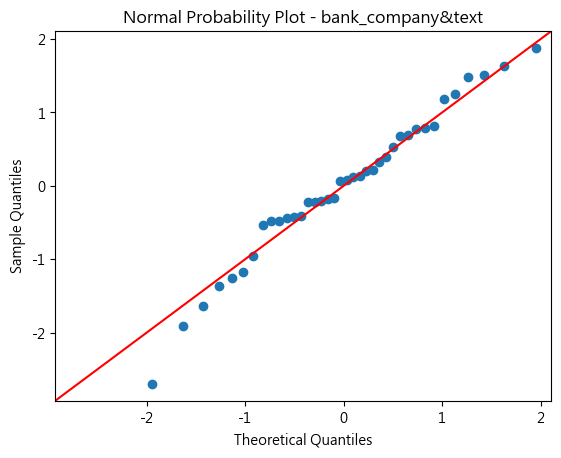

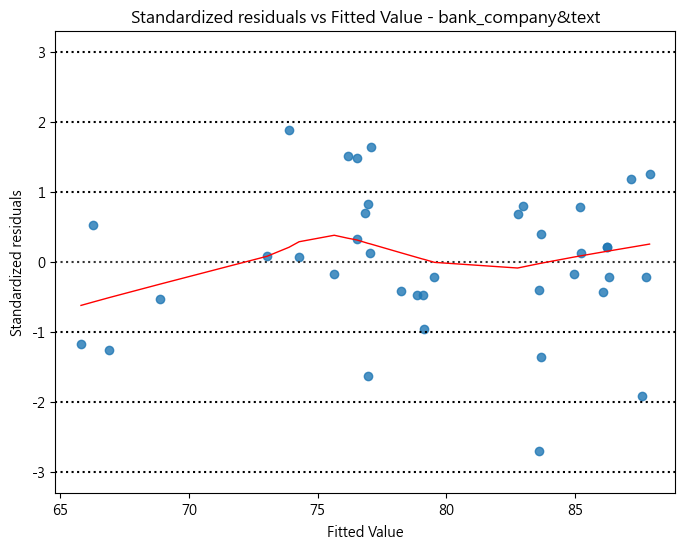

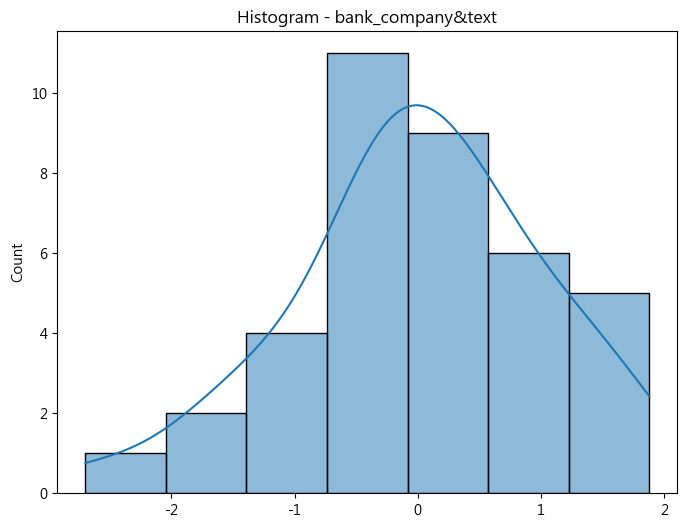

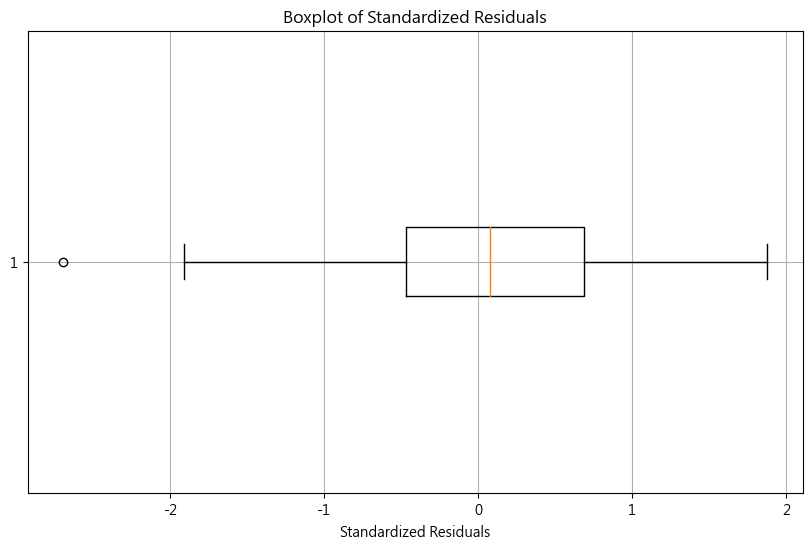

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 绘制残差分析图 - Normal Probability Plot (Q-Q plot)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_standardized, line ='45')
plt.title('Normal Probability Plot - bank_company&text')
plt.show()

# 绘制残差分析图 - Residuals vs Fitted
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals_standardized, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Standardized residuals vs Fitted Value - bank_company&text')
plt.xlabel('Fitted Value')
plt.ylabel('Standardized residuals')
# 設置x軸範圍以顯示所有數據點
plt.xlim(min(predictions) - 1, max(predictions) + 1)
# 添加水平線
line_style = {'linestyle': 'dotted', 'color': 'black', 'linewidth': 1.5}
plt.axhline(y=1, **line_style)
plt.axhline(y=2, **line_style)
plt.axhline(y=3, **line_style)
plt.axhline(y=-1, **line_style)
plt.axhline(y=-2, **line_style)
plt.axhline(y=-3, **line_style)

plt.show()

# 绘制残差分析图 - Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_standardized, kde=True)
plt.title('Histogram - bank_company&text')
plt.show()

#boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(residuals_standardized, vert=False)
plt.title('Boxplot of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.grid(True)
plt.show()

### Residual analysis_corporate+text variables

In [ ]:
import numpy as np

def std_Residuals(X,y):
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    residuals = model.resid
    model_summary = model.summary()
    print(model_summary)

    residuals_std = np.std(residuals)
    residuals_mean = np.mean(residuals)
    residuals_standardized = (residuals - residuals_mean) / residuals_std
    return predictions, residuals_standardized

In [ ]:
def get_standardized_residuals(df, feature_columns, target_column):
    """
    从DataFrame中获取自变量、因变量，并计算标准化残差。
    
    参数:
    df - 包含数据的DataFrame
    feature_columns - 自变量列名的列表
    target_column - 因变量列名
    
    返回:
    标准化残差的数组
    """
    X = df[feature_columns]
    X = sm.add_constant(X)
    y = df[target_column]
    return std_Residuals(X, y)


In [ ]:
predictions_bank_internal, residuals_standardized_bank_internal = get_standardized_residuals(df_bank, 
    ['vectors_Words', 'Total_Count_Unigram', 'Different_Unigrams', 
     'Entropy_Unigram500', 'TTR_Bigram500', 'Simpson_Bigram500', 
     '銀行狀態', '公股', '溫室氣體驗證'], 'Score_internal')#銀文17

predictions_bank_external, residuals_standardized_bank_external = get_standardized_residuals(df_bank, 
    ['vectors_Words', 'Entropy_Unigram500', 'TTR_Bigram500', 
     'Entropy_Bigram500', 'Simpson_Bigram500', '銀行狀態', 
     '資本額', 'TCFD_BSI查核', '有任第三方驗證'], 'Score_external')#銀文19

predictions_life_internal, residuals_standardized_life_internal = get_standardized_residuals(df_life, 
    ['Entropy_Bigram500', 'Simpson_Bigram500', '資本額'], 'Score_internal')#壽文3

predictions_life_external, residuals_standardized_life_external = get_standardized_residuals(df_life, 
    ['TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500', 
     'TTR_Bigram500', '有任第三方驗證', '有金控母公司', '金控母公司是公股'], 'Score_external') #壽文9

predictions_property_internal, residuals_standardized_property_internal = get_standardized_residuals(df_property, 
    ['vectors_Words', 'Different_Bigrams', 'TTR_Bigram500', '有金控母公司'], 'Score_internal')#產文1

predictions_property_external, residuals_standardized_property_external = get_standardized_residuals(df_property, 
    ['vectors_Words', 'TTR_Bigram500', '有金控母公司'], 'Score_external') #產文11


                            OLS Regression Results                            
Dep. Variable:         Score_internal   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     21.57
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           2.45e-10
Time:                        21:26:43   Log-Likelihood:                -123.49
No. Observations:                  38   AIC:                             267.0
Df Residuals:                      28   BIC:                             283.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2465.0219    

In [ ]:
predictions_bank_internal_tcfd, residuals_standardized_bank_internal_tcfd = get_standardized_residuals(df_bank_tcfd, 
    ['vectors_Words', 'Total_Count_Unigram', 'Different_Unigrams', 
     'Entropy_Unigram500', 'TTR_Bigram500', 'Simpson_Bigram500', 
     '銀行狀態', '公股', '溫室氣體驗證'], 'Score_internal')#銀文18

predictions_bank_external_tcfd, residuals_standardized_bank_external_tcfd = get_standardized_residuals(df_bank_tcfd, 
    ['vectors_Words', 'Entropy_Unigram500', 'TTR_Bigram500', 
     'Entropy_Bigram500', 'Simpson_Bigram500', '銀行狀態', 
     '資本額', 'TCFD_BSI查核', '有任第三方驗證'], 'Score_external')#銀文20

predictions_life_internal_tcfd, residuals_standardized_life_internal_tcfd = get_standardized_residuals(df_life_tcfd, 
    ['Entropy_Bigram500', 'Simpson_Bigram500', '資本額'], 'Score_internal')#壽文4

predictions_life_external_tcfd, residuals_standardized_life_external_tcfd = get_standardized_residuals(df_life_tcfd, 
    ['TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500', 
     'TTR_Bigram500', '有任第三方驗證', '有金控母公司', '金控母公司是公股'], 'Score_external')#壽文10

predictions_property_internal_tcfd, residuals_standardized_property_internal_tcfd = get_standardized_residuals(df_property_tcfd, #產文2
    ['vectors_Words', 'Different_Bigrams', 'TTR_Bigram500', '有金控母公司'], 'Score_internal')

predictions_property_external_tcfd, residuals_standardized_property_external_tcfd = get_standardized_residuals(df_property_tcfd, 
    ['vectors_Words', 'TTR_Bigram500', '有金控母公司'], 'Score_external')#產文12


                            OLS Regression Results                            
Dep. Variable:         Score_internal   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     18.75
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           3.97e-08
Time:                        21:26:57   Log-Likelihood:                -100.74
No. Observations:                  31   AIC:                             221.5
Df Residuals:                      21   BIC:                             235.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2206.6716    

c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Q-Q plot

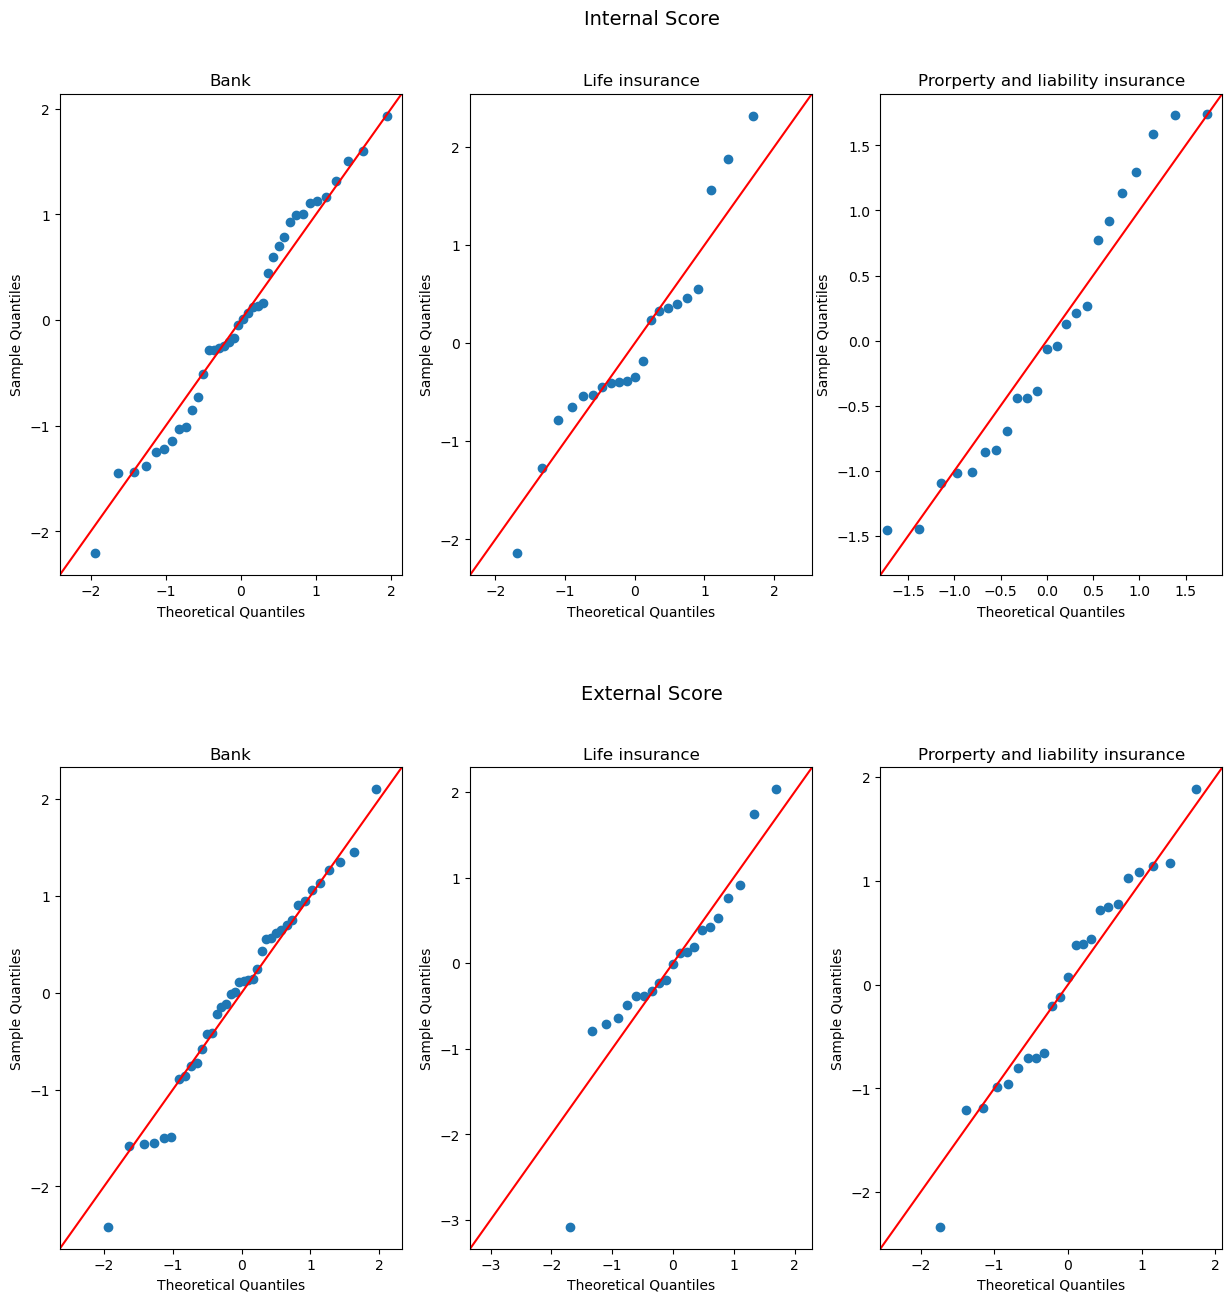

In [ ]:
# 绘制残差分析图
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# Normal Probability Plot (Q-Q plot)
sm.qqplot(residuals_standardized_bank_internal, line ='45', ax=axs[0,0])
axs[0,0].set_title('Bank')

sm.qqplot(residuals_standardized_life_internal, line ='45', ax=axs[0,1])
axs[0,1].set_title('Life insurance')

sm.qqplot(residuals_standardized_property_internal, line ='45', ax=axs[0,2])
axs[0,2].set_title('Prorperty and liability insurance')

sm.qqplot(residuals_standardized_bank_external, line ='45', ax=axs[1,0])
axs[1,0].set_title('Bank')

sm.qqplot(residuals_standardized_life_external, line ='45', ax=axs[1,1])
axs[1,1].set_title('Life insurance')

sm.qqplot(residuals_standardized_property_external, line ='45', ax=axs[1,2])
axs[1,2].set_title('Prorperty and liability insurance')

# 添加第一行的标题
fig.text(0.52, 0.93, 'Internal Score', ha='center', va='center', fontsize=14)

# 添加第二行的标题
fig.text(0.52, 0.48, 'External Score', ha='center', va='center', fontsize=14)

plt.subplots_adjust(hspace=0.4)  # 增加行与行之间的间距

plt.show()

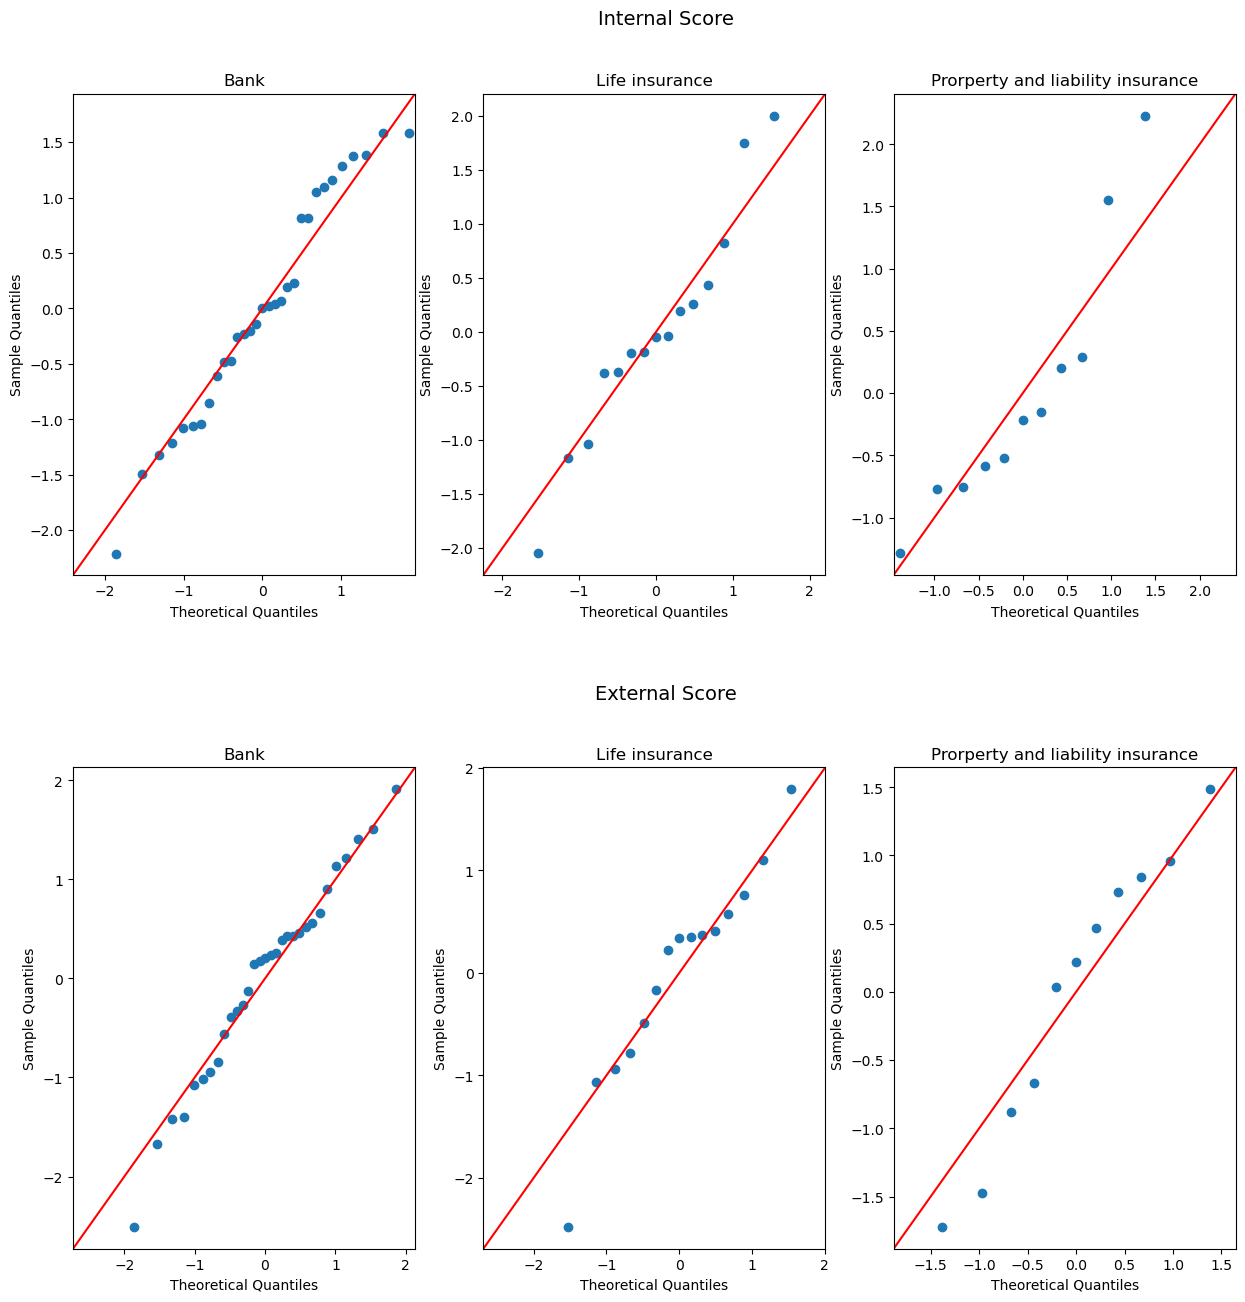

In [ ]:
# 绘制残差分析图
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# Normal Probability Plot (Q-Q plot)
sm.qqplot(residuals_standardized_bank_internal_tcfd, line ='45', ax=axs[0,0])
axs[0,0].set_title('Bank')

sm.qqplot(residuals_standardized_life_internal_tcfd, line ='45', ax=axs[0,1])
axs[0,1].set_title('Life insurance')

sm.qqplot(residuals_standardized_property_internal_tcfd, line ='45', ax=axs[0,2])
axs[0,2].set_title('Prorperty and liability insurance')

sm.qqplot(residuals_standardized_bank_external_tcfd, line ='45', ax=axs[1,0])
axs[1,0].set_title('Bank')

sm.qqplot(residuals_standardized_life_external_tcfd, line ='45', ax=axs[1,1])
axs[1,1].set_title('Life insurance')

sm.qqplot(residuals_standardized_property_external_tcfd, line ='45', ax=axs[1,2])
axs[1,2].set_title('Prorperty and liability insurance')

# 添加第一行的标题
fig.text(0.52, 0.93, 'Internal Score', ha='center', va='center', fontsize=14)

# 添加第二行的标题
fig.text(0.52, 0.48, 'External Score', ha='center', va='center', fontsize=14)

plt.subplots_adjust(hspace=0.4)  # 增加行与行之间的间距

plt.show()

### Histogram

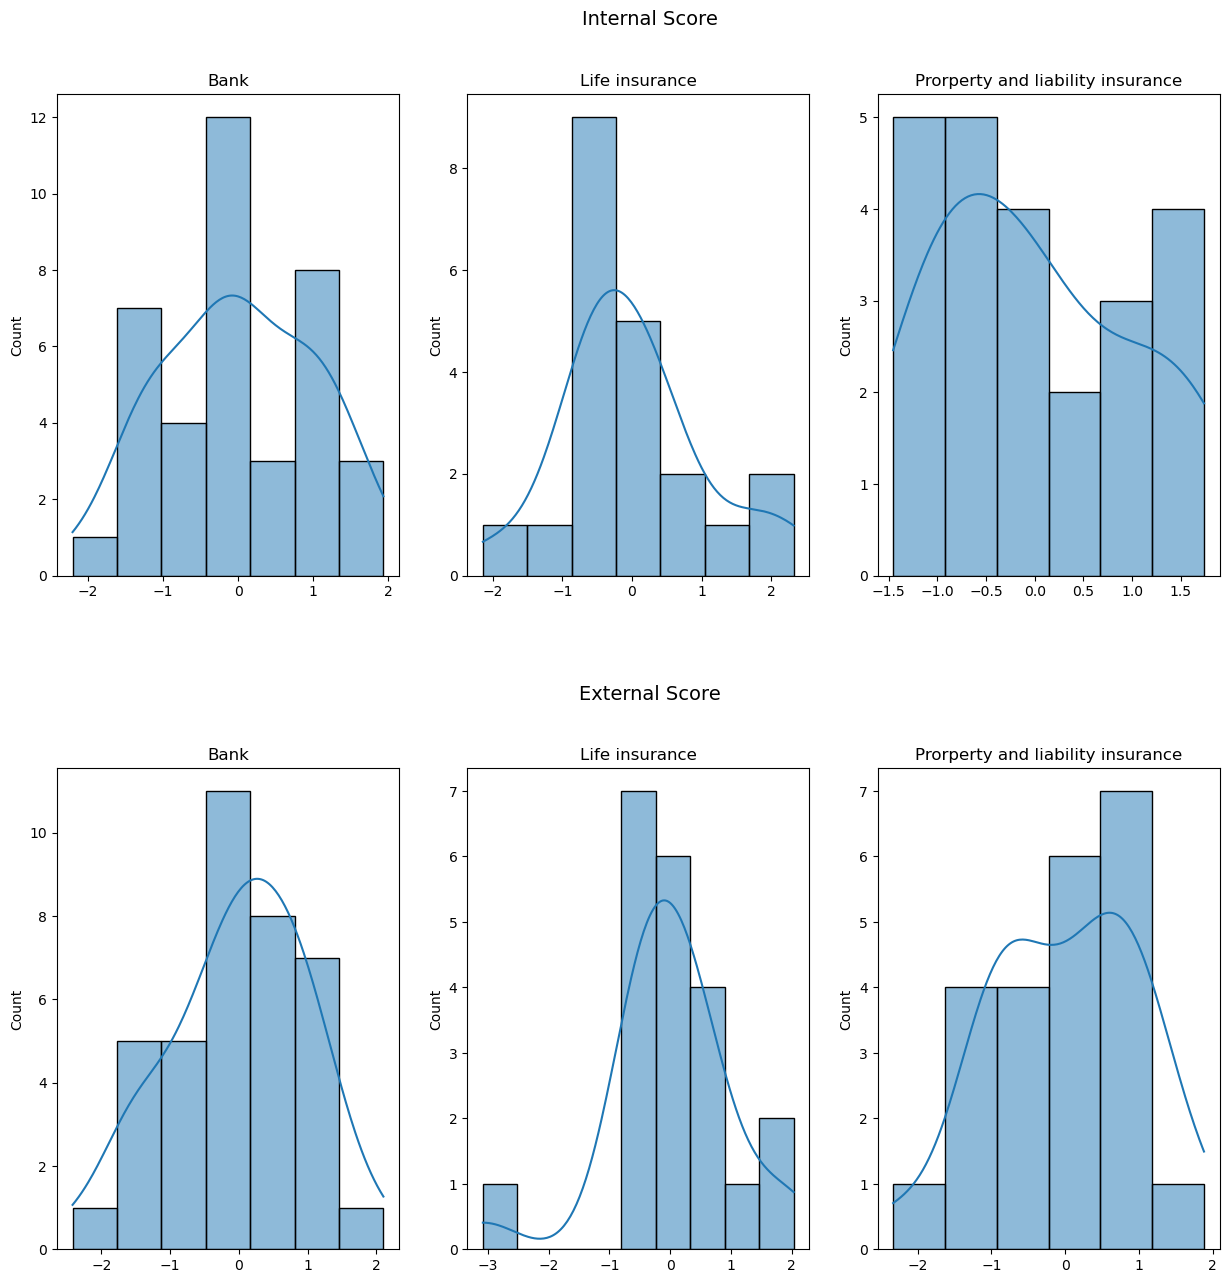

In [ ]:
# 绘制残差分析图
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# histogram
sns.histplot(residuals_standardized_bank_internal, kde=True, ax=axs[0,0])
axs[0,0].set_title('Bank')

sns.histplot(residuals_standardized_life_internal, kde=True, ax=axs[0,1])
axs[0,1].set_title('Life insurance')

sns.histplot(residuals_standardized_property_internal, kde=True, ax=axs[0,2])
axs[0,2].set_title('Prorperty and liability insurance')

sns.histplot(residuals_standardized_bank_external, kde=True, ax=axs[1,0])
axs[1,0].set_title('Bank')

sns.histplot(residuals_standardized_life_external, kde=True, ax=axs[1,1])
axs[1,1].set_title('Life insurance')

sns.histplot(residuals_standardized_property_external, kde=True, ax=axs[1,2])
axs[1,2].set_title('Prorperty and liability insurance')

# 添加第一行的标题
fig.text(0.52, 0.93, 'Internal Score', ha='center', va='center', fontsize=14)

# 添加第二行的标题
fig.text(0.52, 0.48, 'External Score', ha='center', va='center', fontsize=14)

plt.subplots_adjust(hspace=0.4)  # 增加行与行之间的间距

plt.show()

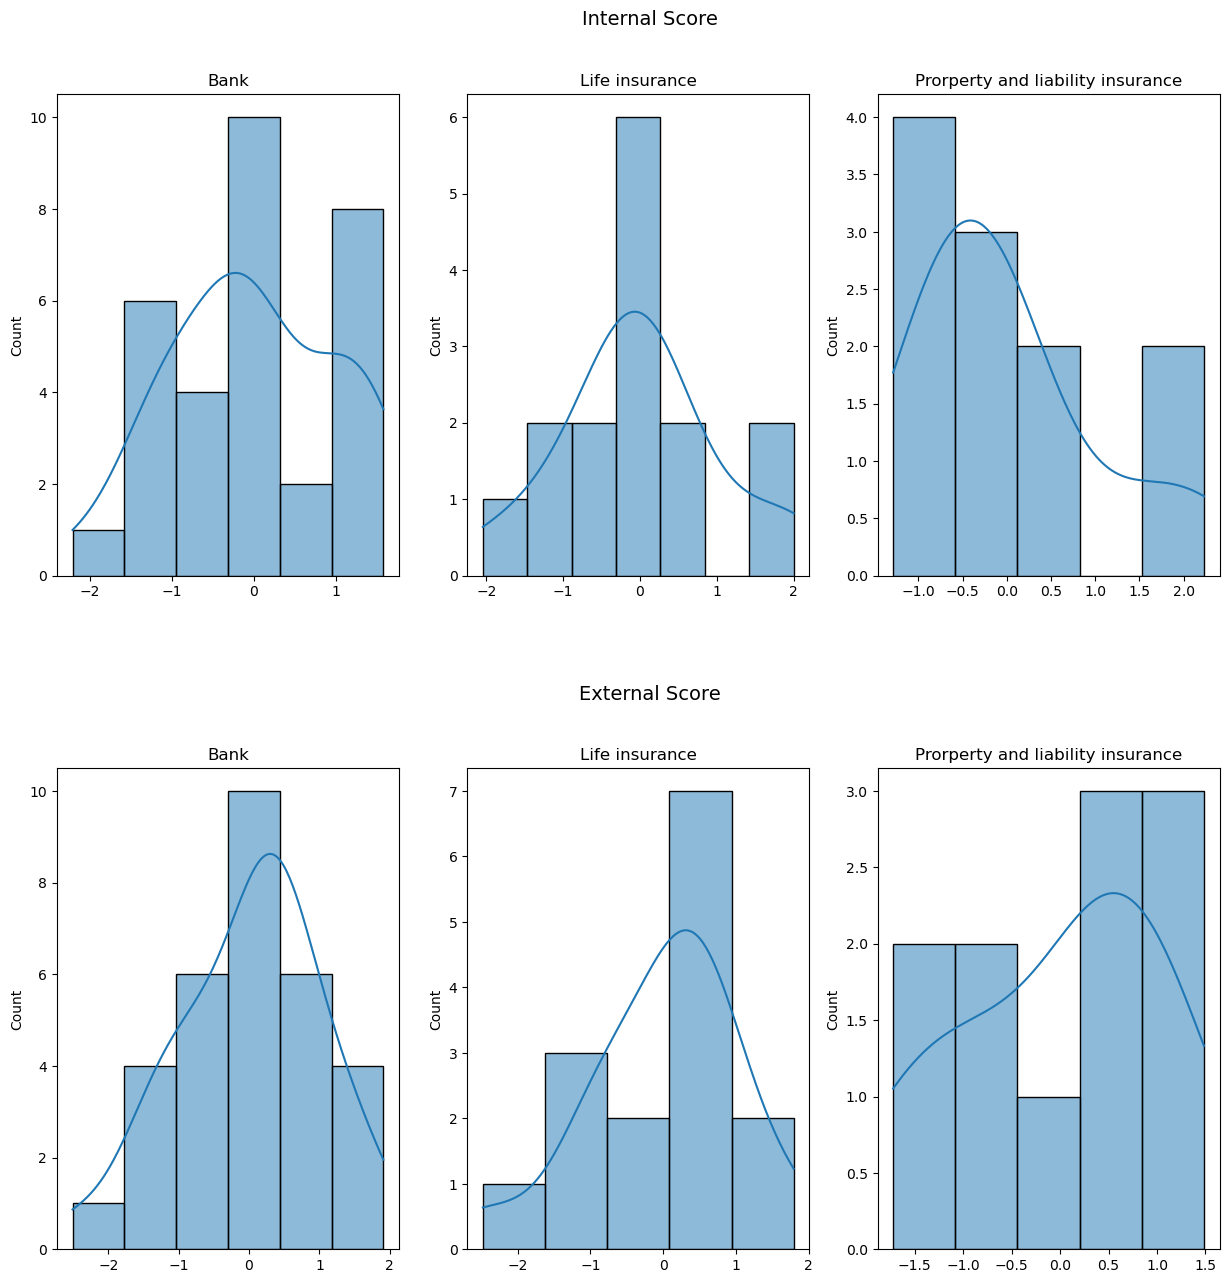

In [ ]:
# 绘制残差分析图
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# histogram
sns.histplot(residuals_standardized_bank_internal_tcfd, kde=True, ax=axs[0,0])
axs[0,0].set_title('Bank')

sns.histplot(residuals_standardized_life_internal_tcfd, kde=True, ax=axs[0,1])
axs[0,1].set_title('Life insurance')

sns.histplot(residuals_standardized_property_internal_tcfd, kde=True, ax=axs[0,2])
axs[0,2].set_title('Prorperty and liability insurance')

sns.histplot(residuals_standardized_bank_external_tcfd, kde=True, ax=axs[1,0])
axs[1,0].set_title('Bank')

sns.histplot(residuals_standardized_life_external_tcfd, kde=True, ax=axs[1,1])
axs[1,1].set_title('Life insurance')

sns.histplot(residuals_standardized_property_external_tcfd, kde=True, ax=axs[1,2])
axs[1,2].set_title('Prorperty and liability insurance')

# 添加第一行的标题
fig.text(0.52, 0.93, 'Internal Score', ha='center', va='center', fontsize=14)

# 添加第二行的标题
fig.text(0.52, 0.48, 'External Score', ha='center', va='center', fontsize=14)

plt.subplots_adjust(hspace=0.4)  # 增加行与行之间的间距

plt.show()

### Boxplot

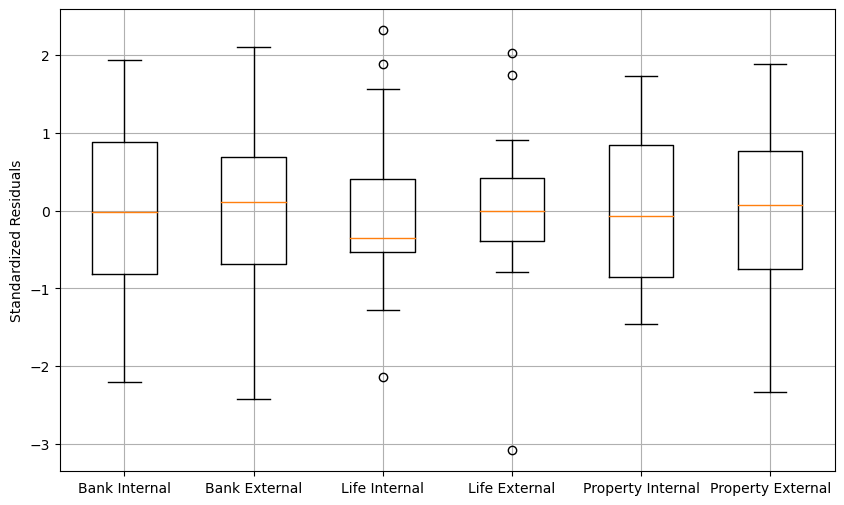

In [ ]:
import matplotlib.pyplot as plt

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot([residuals_standardized_bank_internal, residuals_standardized_bank_external,
             residuals_standardized_life_internal, residuals_standardized_life_external,
             residuals_standardized_property_internal, residuals_standardized_property_external], 
            vert=True, labels=['Bank Internal', 'Bank External', 
                                'Life Internal', 'Life External', 
                                'Property Internal', 'Property External'])
#plt.title('Boxplot of Standardized Residuals')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.show()

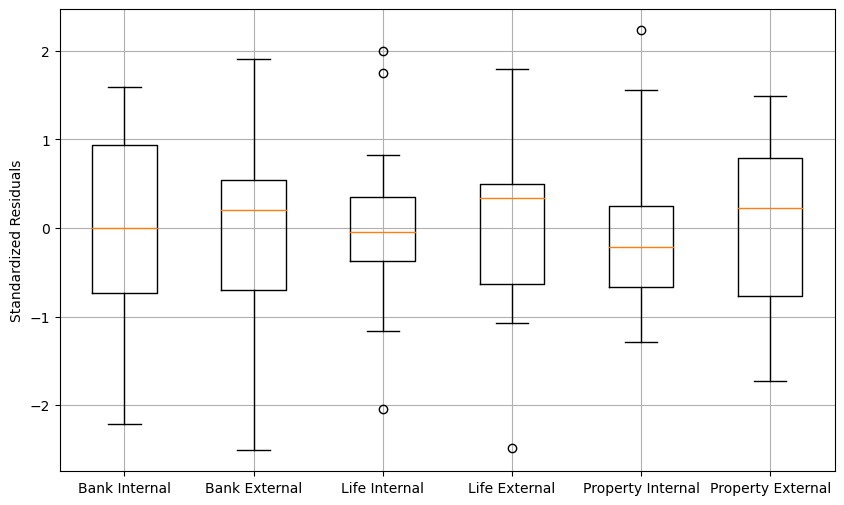

In [ ]:
# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot([residuals_standardized_bank_internal_tcfd, residuals_standardized_bank_external_tcfd,
             residuals_standardized_life_internal_tcfd, residuals_standardized_life_external_tcfd,
             residuals_standardized_property_internal_tcfd, residuals_standardized_property_external_tcfd], 
            vert=True, labels=['Bank Internal', 'Bank External', 
                                'Life Internal', 'Life External', 
                                'Property Internal', 'Property External'])
#plt.title('Boxplot of Standardized Residuals')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.show()

### Scatter plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 定义一个函数来设置 x 轴范围并添加水平线
def customize_plot(ax, predictions):
    """
    自定义绘图，设置x轴范围并添加水平线。

    参数:
    ax - 当前的轴对象
    predictions - 用于设置x轴范围的预测值
    """
    # 设置x轴范围以显示所有数据点
    ax.set_xlim(min(predictions) - 1, max(predictions) + 1)

    # 添加水平线
    line_style = {'linestyle': 'dotted', 'color': 'black', 'linewidth': 1.5}
    ax.axhline(y=1, **line_style)
    ax.axhline(y=2, **line_style)
    ax.axhline(y=3, **line_style)
    ax.axhline(y=-1, **line_style)
    ax.axhline(y=-2, **line_style)
    ax.axhline(y=-3, **line_style)


c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


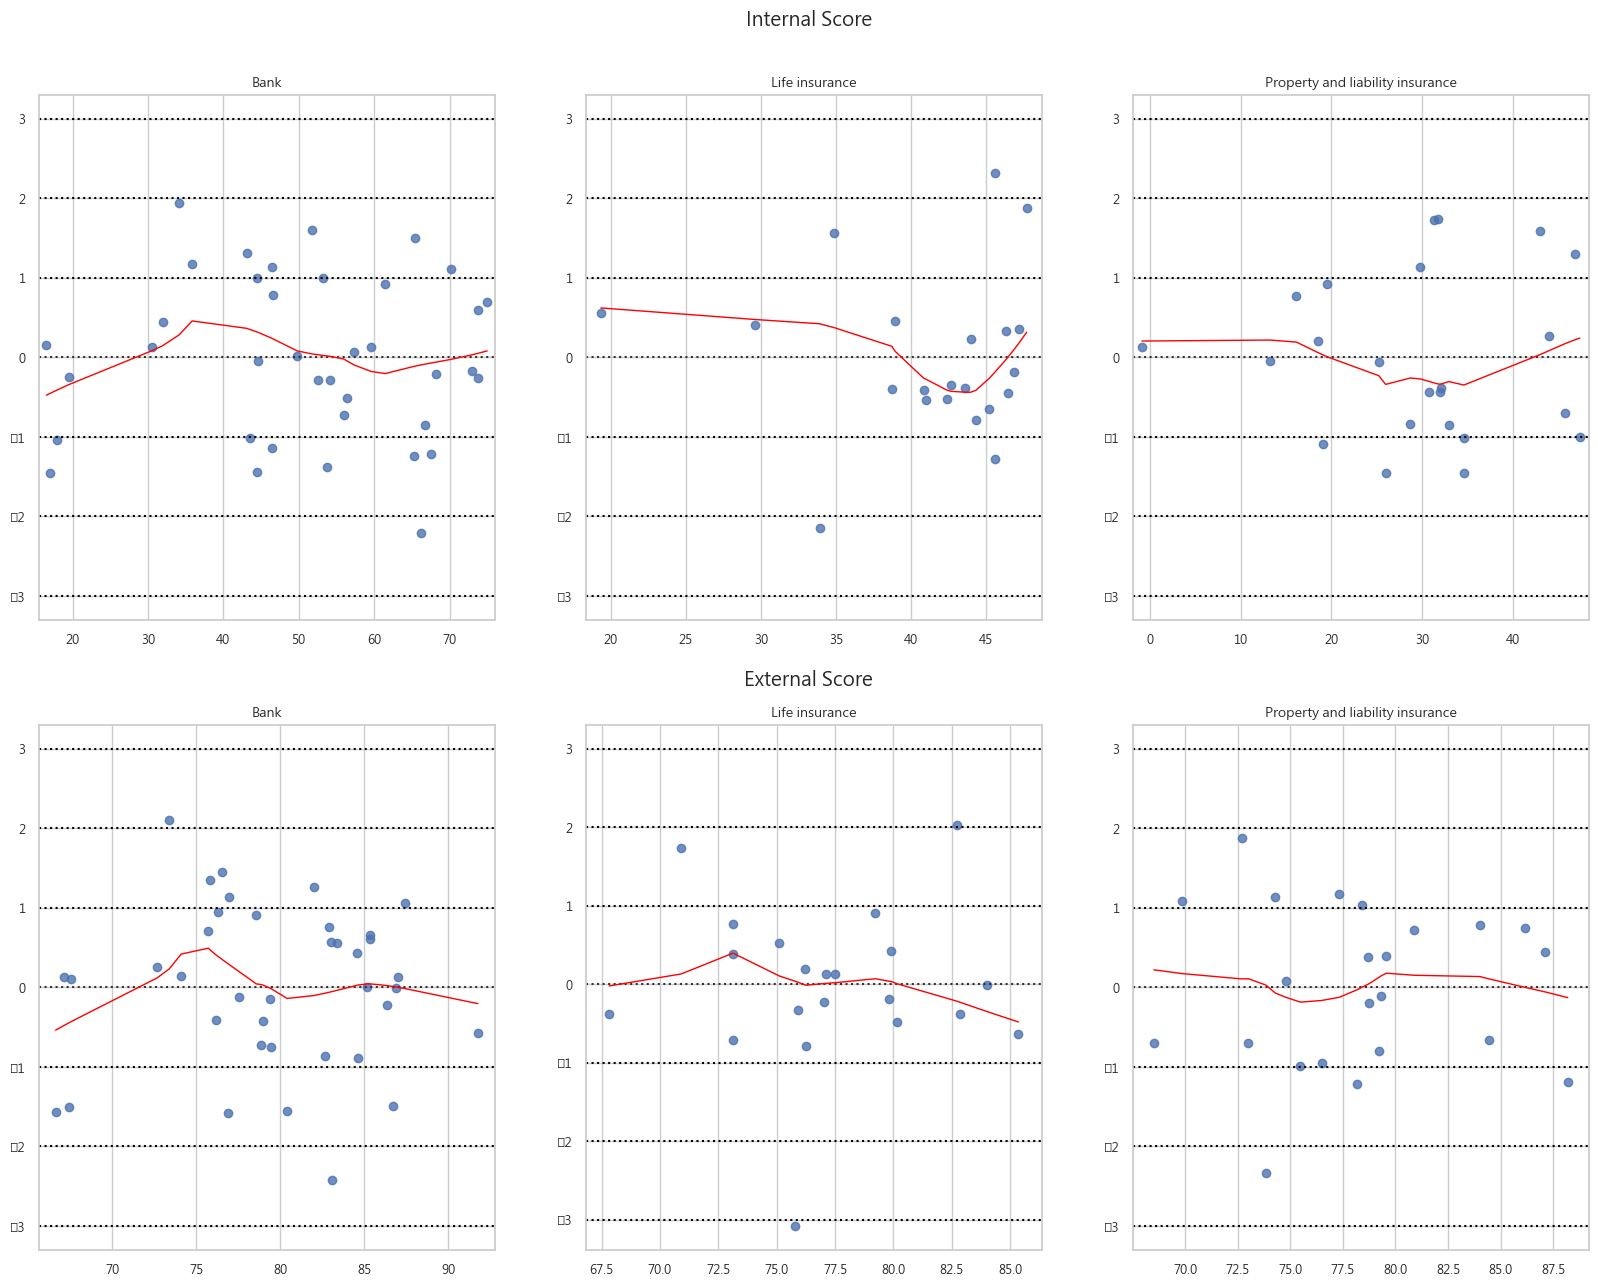

In [ ]:
# 绘制残差分析图
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# 定义你的 predictions 变量（此处假设它是某个模型的预测值）

# 第一行 - 内部评分
sns.residplot(x=predictions_bank_internal, y=residuals_standardized_bank_internal, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 0])
axs[0, 0].set_title('Bank')
customize_plot(axs[0, 0], predictions_bank_internal)

sns.residplot(x=predictions_life_internal, y=residuals_standardized_life_internal, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 1])
axs[0, 1].set_title('Life insurance')
customize_plot(axs[0, 1], predictions_life_internal)

sns.residplot(x=predictions_property_internal, y=residuals_standardized_property_internal, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 2])
axs[0, 2].set_title('Property and liability insurance')
customize_plot(axs[0, 2], predictions_property_internal)

# 第二行 - 外部评分
sns.residplot(x=predictions_bank_external, y=residuals_standardized_bank_external, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 0])
axs[1, 0].set_title('Bank')
customize_plot(axs[1, 0], predictions_bank_external)

sns.residplot(x=predictions_life_external, y=residuals_standardized_life_external, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 1])
axs[1, 1].set_title('Life insurance')
customize_plot(axs[1, 1], predictions_life_external)

sns.residplot(x=predictions_property_external, y=residuals_standardized_property_external, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 2])
axs[1, 2].set_title('Property and liability insurance')
customize_plot(axs[1, 2], predictions_property_external)

# 添加第一行的标题
fig.text(0.51, 0.93, 'Internal Score', ha='center', va='center', fontsize=14)

# 添加第二行的标题
fig.text(0.51, 0.49, 'External Score', ha='center', va='center', fontsize=14)

# 调整布局，增加行与行之间的间距
plt.subplots_adjust(hspace=0.2)

plt.show()


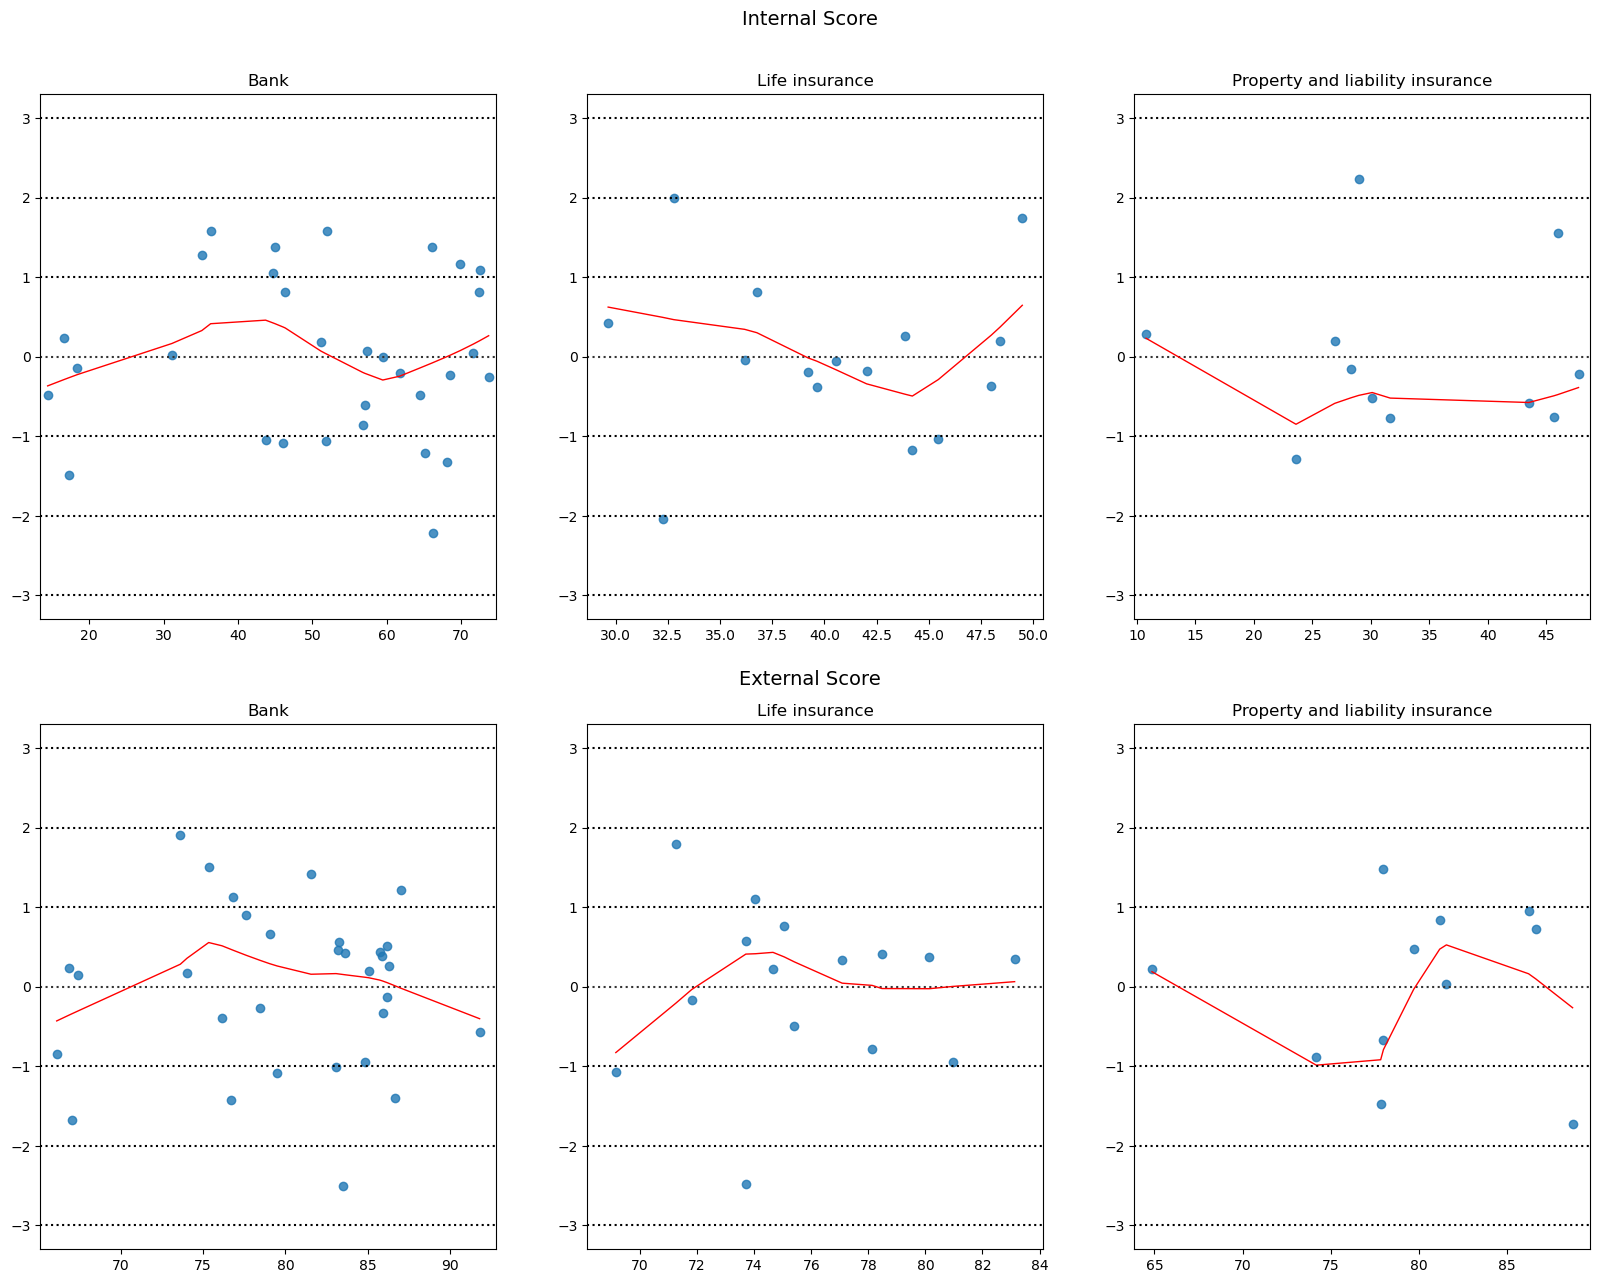

In [ ]:
# 绘制残差分析图
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# 定义你的 predictions 变量（此处假设它是某个模型的预测值）

# 第一行 - 内部评分
sns.residplot(x=predictions_bank_internal_tcfd, y=residuals_standardized_bank_internal_tcfd, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 0])
axs[0, 0].set_title('Bank')
customize_plot(axs[0, 0], predictions_bank_internal_tcfd)

sns.residplot(x=predictions_life_internal_tcfd, y=residuals_standardized_life_internal_tcfd, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 1])
axs[0, 1].set_title('Life insurance')
customize_plot(axs[0, 1], predictions_life_internal_tcfd)

sns.residplot(x=predictions_property_internal_tcfd, y=residuals_standardized_property_internal_tcfd, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0, 2])
axs[0, 2].set_title('Property and liability insurance')
customize_plot(axs[0, 2], predictions_property_internal_tcfd)

# 第二行 - 外部评分
sns.residplot(x=predictions_bank_external_tcfd, y=residuals_standardized_bank_external_tcfd, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 0])
axs[1, 0].set_title('Bank')
customize_plot(axs[1, 0], predictions_bank_external_tcfd)

sns.residplot(x=predictions_life_external_tcfd, y=residuals_standardized_life_external_tcfd, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 1])
axs[1, 1].set_title('Life insurance')
customize_plot(axs[1, 1], predictions_life_external_tcfd)

sns.residplot(x=predictions_property_external_tcfd, y=residuals_standardized_property_external_tcfd, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 2])
axs[1, 2].set_title('Property and liability insurance')
customize_plot(axs[1, 2], predictions_property_external_tcfd)

# 添加第一行的标题
fig.text(0.51, 0.93, 'Internal Score', ha='center', va='center', fontsize=14)

# 添加第二行的标题
fig.text(0.51, 0.49, 'External Score', ha='center', va='center', fontsize=14)

# 调整布局，增加行与行之间的间距
plt.subplots_adjust(hspace=0.2)

plt.show()


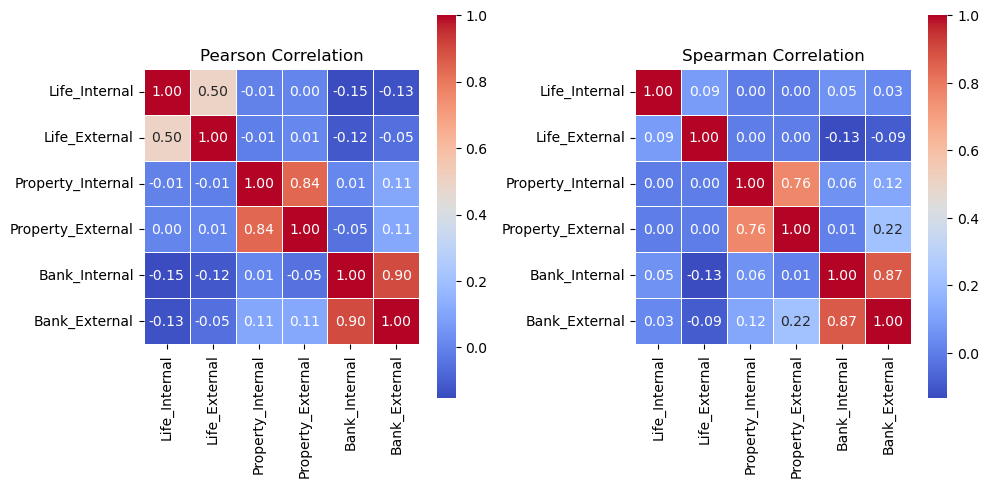

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_p, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=axs[0]) #, square=True
axs[0].set_title('Pearson Correlation')

sns.heatmap(corr_matrix_s, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=axs[1])
axs[1].set_title('Spearman Correlation')
# Adjust layout
plt.tight_layout()

## Export predicted values

In [ ]:
df= pd.read_excel('./data/insuranceContent/ins_tcfdesg_feature.xlsx')
df_life_tcfdesg = df[(df['Life_Ins'] == 1)]
df_life_tcfdesg.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 20
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Filename             21 non-null     object 
 1   Year                 21 non-null     int64  
 2   Life_Ins             21 non-null     int64  
 3   Property_Ins         21 non-null     int64  
 4   Company_Name         21 non-null     object 
 5   Company_Name_CN      21 non-null     object 
 6   tcfd                 21 non-null     int64  
 7   esg                  21 non-null     int64  
 8   Text                 21 non-null     object 
 9   Total_Count_Unigram  21 non-null     int64  
 10  Different_Unigrams   21 non-null     int64  
 11  TTR_Unigram500       21 non-null     int64  
 12  TTR_Unigram1000      21 non-null     int64  
 13  TTR_Unigram2000      21 non-null     int64  
 14  TTR_Unigram3000      21 non-null     int64  
 15  TTR_Unigram4000      21 non-null     int64  
 1

In [ ]:
X = df_life_tcfdesg[[
                  'vectors_Words',
                  'Different_Unigrams',
                  'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
                  'Total_Count_Bigram', 'Different_Bigrams',
                  '有金控母公司']]#, '有金控母公司', 'Total_Count_Unigram',                    
X = sm.add_constant(X)
y = df_life_tcfdesg['Score']

model = sm. OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)
predictions = model.predict(X)
residuals = y - predictions

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     2.071
Date:                Mon, 01 Jul 2024   Prob (F-statistic):              0.123
Time:                        19:55:19   Log-Likelihood:                -70.334
No. Observations:                  21   AIC:                             158.7
Df Residuals:                      12   BIC:                             168.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3926.3665   2384

In [ ]:

# 創建一個新的DataFrame包含銀行名稱、預測值和殘差
results_df = pd.DataFrame({
    'propertyInsName': df_life_tcfdesg['Company_Name_CN'],
    'Score': df_life_tcfdesg['Score'],
    #'pInsModel_Predicted': predictions,
    #'pInsModel_Residuals': residuals,
    #'pInsModel_StandardizedResiduals': residuals_standardized,
    #'ptextModel_Predicted': predictions,
    #'ptextModel_Residuals': residuals,
    #'ptextModel_StandardizedResiduals': residuals_standardized,
    'lInstextModel_Predicted': predictions,
    'lInsTextModel_Residuals': residuals,
    #'lInsTextModel_StandardizedResiduals': residuals_standardized
    })

results_df

,propertyInsName,Score,lInstextModel_Predicted,lInsTextModel_Residuals
0,中國人壽,49.686599,39.037162,10.649438
1,裕利安怡,26.977095,35.115466,-8.138371
2,台銀人壽,60.907873,53.038981,7.868893
3,保誠人壽,40.825938,40.123187,0.702751
4,安達國際人壽,18.873457,35.642528,-16.769071
5,宏泰人壽,45.592150,43.499636,2.092515
6,台灣人壽,39.164784,41.360321,-2.195536
7,台新人壽,36.584891,40.483299,-3.898408
8,第一金人壽,35.951499,37.867681,-1.916182
9,新光人壽,43.314120,44.475782,-1.161661


In [ ]:
results_df.to_excel('./data/insuranceContent/估計/pInsTextModel.xlsx', index=False)

# Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [2]:
train = pd.read_excel('./data/bankContent/bank_regression.xlsx')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Filename                       38 non-null     object 
 1   Text_cleaned                   38 non-null     object 
 2   Words                          38 non-null     object 
 3   association_word               38 non-null     object 
 4   top_association_word           38 non-null     object 
 5   Words_top100                   38 non-null     object 
 6   vectors_Wordsassociation       38 non-null     float64
 7   vectors_Wordsassociationtop10  38 non-null     float64
 8   vectors_Wordstop100            38 non-null     float64
 9   FilenameTempCN                 38 non-null     object 
 10  corpName                       38 non-null     object 
 11  tcfd                           38 non-null     int64  
 12  esg                            38 non-null     int64

In [ ]:
train.describe()

,vectors_Wordsassociation,vectors_Wordsassociationtop10,vectors_Wordstop100,tcfd,esg,有金控母公司,銀行上市櫃狀態,TCFD_會計師確信,TCFD_BSI查核,溫室氣體驗證,...,Simpson_Bigram1000,Simpson_Bigram2000,Simpson_Bigram3000,Simpson_Bigram4000,Simpson_Bigram5000,vectors_Words,vectors_Wordstop500,vectors_Wordstop10,銀行狀態,vectors_Words_pca
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,4.254109,-2.176659,1.603031,0.815789,0.184211,0.368421,0.578947,0.026316,0.157895,0.078947,...,0.009588,0.009101,0.008934,0.008848,0.008801,5.222856,2.355352,1.798323,0.605263,-9.160660e-08
std,0.195556,0.027453,0.018204,0.392859,0.392859,0.488852,0.889323,0.162221,0.369537,0.273276,...,0.003753,0.003778,0.003784,0.003772,0.003780,0.806308,0.560461,0.401411,0.495355,5.648785e-01
min,3.623142,-2.223837,1.569344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004349,0.003867,0.003700,0.003616,0.003569,2.915094,2.054304,1.587697,0.000000,-1.531368e+00
25%,4.143374,-2.198046,1.591887,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007272,0.006771,0.006585,0.006509,0.006476,5.148721,2.090214,1.597059,0.000000,-2.329892e-01
50%,4.262854,-2.177784,1.602821,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008536,0.008044,0.007888,0.007814,0.007759,5.506793,2.103227,1.613411,1.000000,-5.653339e-02
75%,4.378853,-2.160350,1.613091,1.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,...,0.011118,0.010658,0.010506,0.010395,0.010374,5.683855,2.123664,1.638682,1.000000,2.502876e-01
max,4.682680,-2.114251,1.654918,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.020031,0.019649,0.019536,0.019345,0.019386,6.322422,3.848492,2.758421,1.000000,1.556469e+00


C:\Users\USER\AppData\Local\Temp\ipykernel_21616\36893116.py:5: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


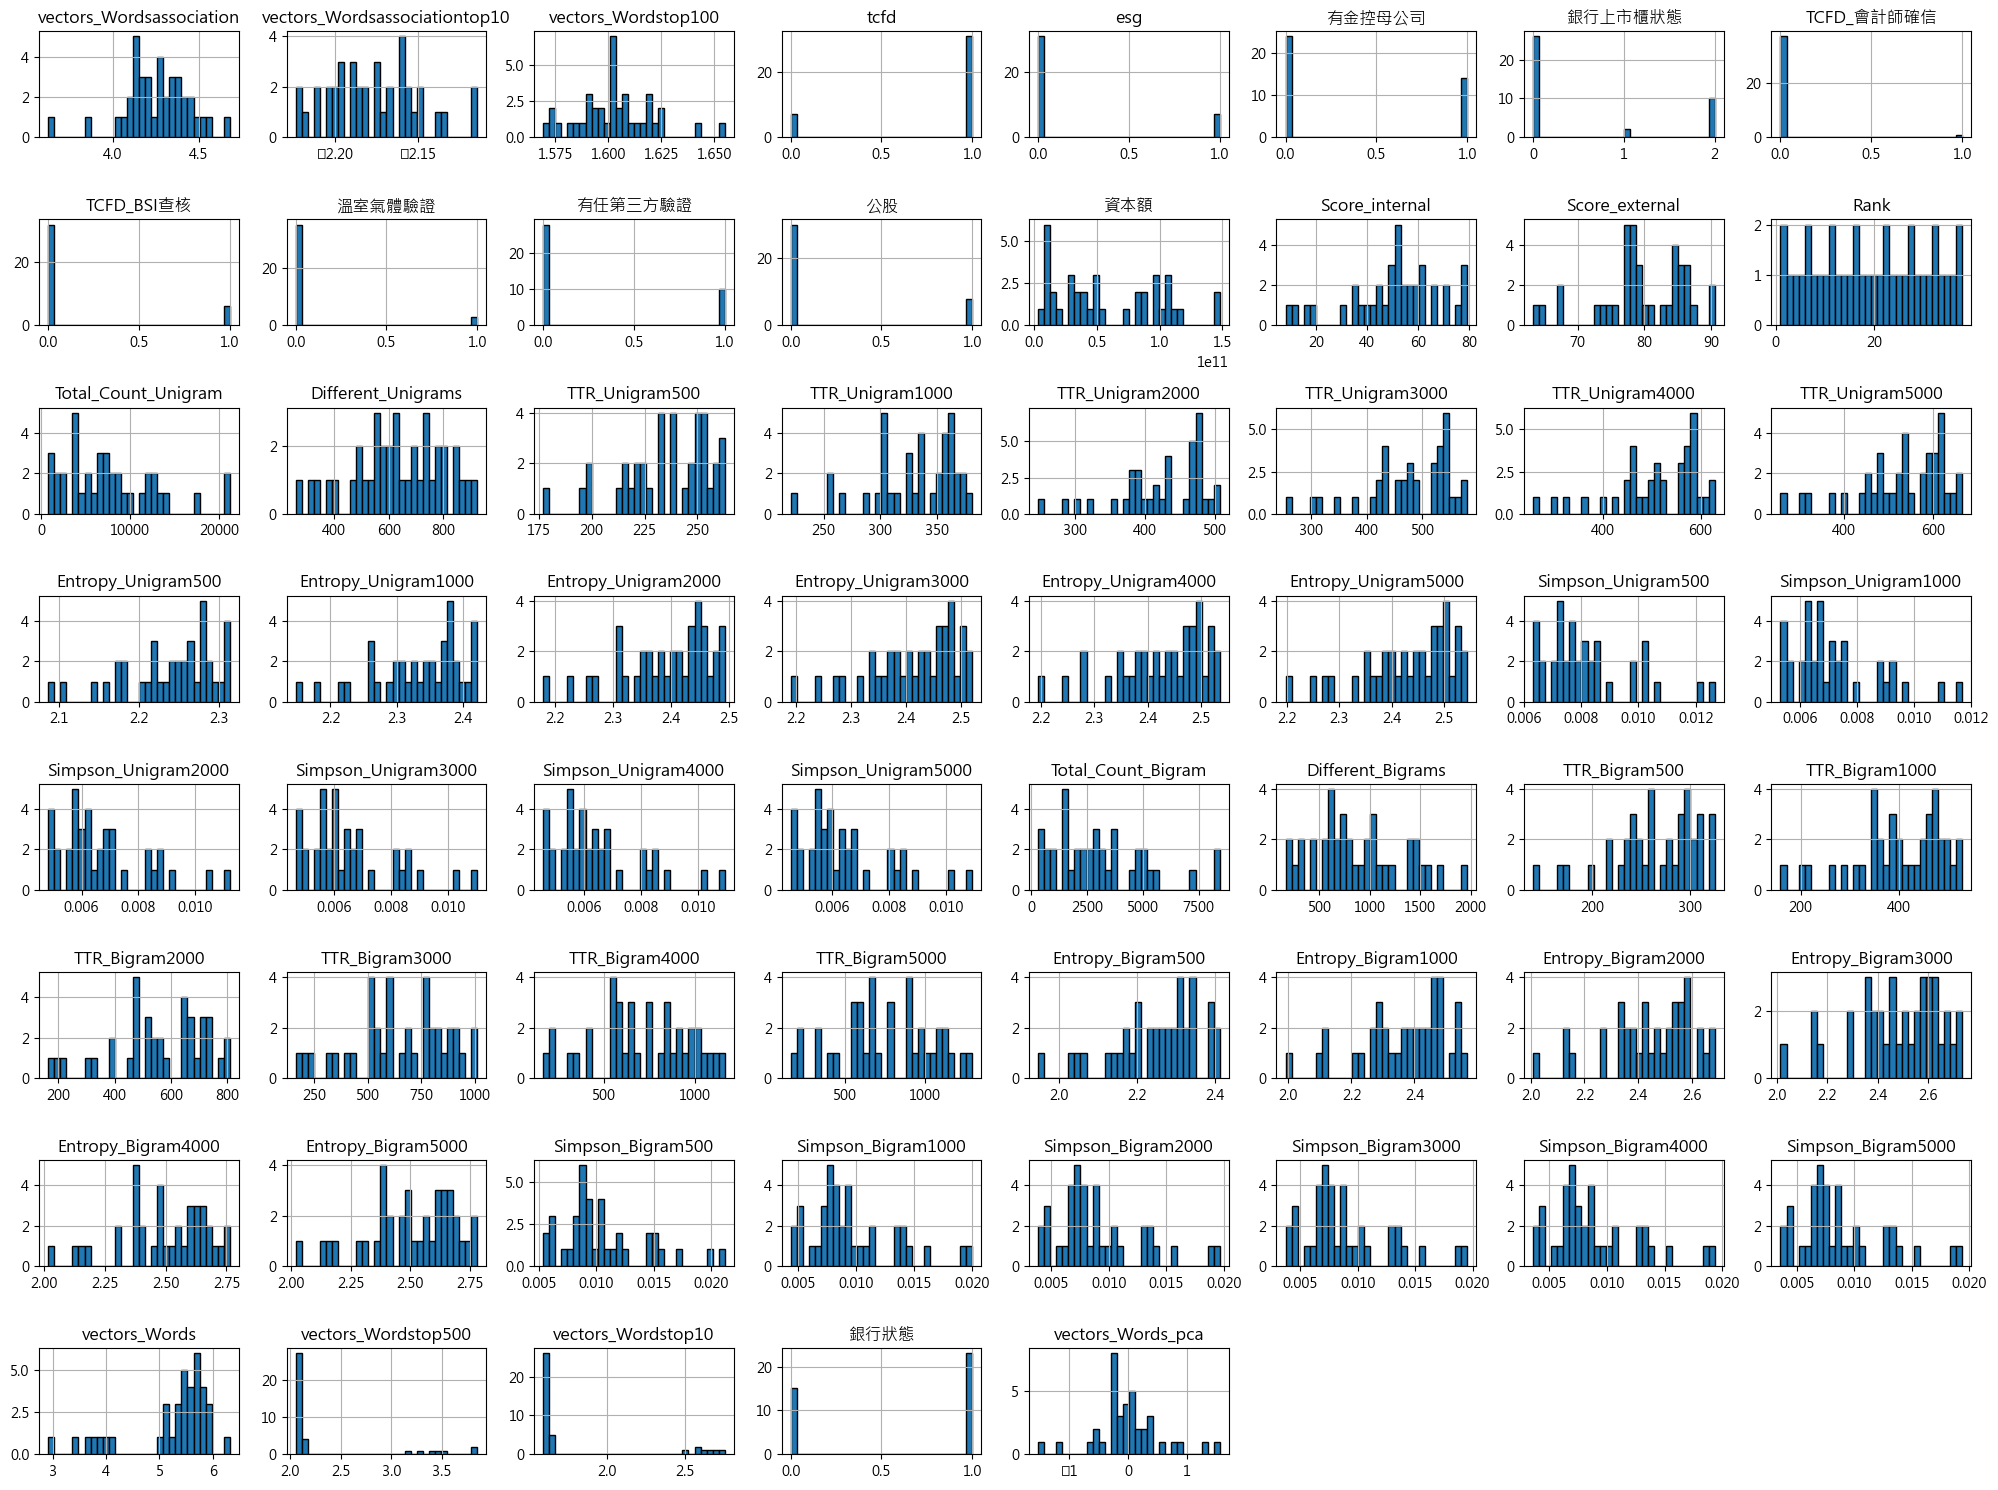

In [ ]:
# 數值型變數的基本描述
numeric_cols = train.select_dtypes(include=['float64', 'int64'])

numeric_cols.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

## Do not execute! Save 500 times train-val indices

In [80]:
X = train.drop(columns=['Score_internal', 'Score_external', 'Rank',
                        'Filename', 'FilenameTempCN', 'corpName', 'Text_uncleaned', '備註', 
                        'Text_cleaned', 'Words', 'association_word', 'top_association_word', 'Words_top100',
                        'vectors_Wordsassociation', 'vectors_Wordsassociationtop10'
                        ])

y= train['Score_external']#, 'Score_external']

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vectors_Wordstop100  38 non-null     float64
 1   tcfd                 38 non-null     int64  
 2   esg                  38 non-null     int64  
 3   有金控母公司               38 non-null     int64  
 4   銀行上市櫃狀態              38 non-null     int64  
 5   TCFD_會計師確信           38 non-null     int64  
 6   TCFD_BSI查核           38 non-null     int64  
 7   溫室氣體驗證               38 non-null     int64  
 8   有任第三方驗證              38 non-null     int64  
 9   公股                   38 non-null     int64  
 10  資本額                  38 non-null     int64  
 11  Total_Count_Unigram  38 non-null     int64  
 12  Different_Unigrams   38 non-null     int64  
 13  TTR_Unigram500       38 non-null     int64  
 14  TTR_Unigram1000      38 non-null     int64  
 15  TTR_Unigram2000      38 non-null     int64

In [82]:
train_val_indices = {
    'train_indices': [],
    'val_indices': []
}

numTrials = 500
train_sample = 0
val_sample = 0
traindistribution = 0
valdistribution = 0

for i in range(numTrials):
    # 保存訓練和驗證集的索引
    # 使用train_test_split來切分資料，但只記錄索引，去掉stratify參數
    X_train_indices, X_val_indices, _, _ = train_test_split(np.arange(len(X)), y, test_size=0.2, random_state=None)
    train_val_indices['train_indices'].append(X_train_indices.tolist())
    train_val_indices['val_indices'].append(X_val_indices.tolist())
    # 查看全部資料三種類別比例
    traindistribution += pd.Series(y[X_train_indices]).describe()
    valdistribution += pd.Series(y[X_val_indices]).describe()
    train_sample += len(X_train_indices)
    val_sample += len(X_val_indices)
# 保存切分索引
np.save('train_val_indices_regression_bank_simulation500.npy', train_val_indices, allow_pickle=True)

print(f"Train sample:{train_sample}\nVal sample:{val_sample}")
print(f"Train distribution:\n{traindistribution/numTrials}\nVal distribution:\n{valdistribution/numTrials}")

Train sample:15000
Val sample:4000
Train distribution:
count    30.000000
mean     79.549291
std       6.587337
min      63.647083
25%      77.109354
50%      79.172750
75%      84.714667
max      90.246300
Name: Score_external, dtype: float64
Val distribution:
count     8.000000
mean     79.787035
std       6.434089
min      68.907250
25%      76.681687
50%      80.292167
75%      83.978042
max      87.838817
Name: Score_external, dtype: float64


In [85]:
# 檢查數據類型和內容
print(f"train_val_indices type: {type(train_val_indices)}")
print('===1/100 sampling===')
print(f"{len(train_val_indices['train_indices'][0])} Train indices for the first sampling(1/500): {train_val_indices['train_indices'][0]}")
print(f"{len(train_val_indices['val_indices'][0])} Val indices for the first sampling(1/500): {train_val_indices['val_indices'][0]}")

train_val_indices type: <class 'dict'>
===1/100 sampling===
30 Train indices for the first sampling(1/500): [3, 14, 28, 5, 31, 22, 10, 8, 13, 32, 34, 23, 27, 37, 12, 33, 4, 6, 15, 2, 11, 1, 36, 26, 20, 18, 7, 35, 0, 30]
8 Val indices for the first sampling(1/500): [29, 24, 17, 25, 21, 19, 16, 9]


In [89]:
print(len(train_val_indices['val_indices']))

500


In [86]:
# 檢查有哪些鍵存在於 train_test_indices 中
print("Available keys:", train_val_indices.keys())

Available keys: dict_keys(['train_indices', 'val_indices'])


## Use saved indices to cross validation

## Project process
1. 標準化 X
2. 在 train set 上進行 模擬100次 交叉驗證
    * train loss, val loss
3. 無 test set

###  prepare variables

In [119]:
X_all = train.drop(columns=['Score_internal', 'Score_external', 'Rank', 
                            'Filename', 'FilenameTempCN', 'corpName', 'Text_uncleaned', '備註', 'Text_cleaned', 'Words', 'association_word', 'top_association_word', 'Words_top100',
                            'vectors_Wordsassociation', 'vectors_Wordsassociationtop10'
                            ])

X_ols = train[['vectors_Words', 'Entropy_Unigram500', 'TTR_Bigram500', 'Entropy_Bigram500', 'Simpson_Bigram500',
               '銀行狀態', '資本額', '有任第三方驗證', 'TCFD_BSI查核']] 

y = train['Score_external']

In [102]:
#X_ols = train[['vectors_Words', 'Entropy_Unigram500', 'TTR_Bigram500', 'Simpson_Bigram500',
#               'Total_Count_Unigram', 'Different_Unigrams',
#               '銀行狀態', '公股', '溫室氣體驗證']]
#y = train['Score_internal']

In [120]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vectors_Wordstop100  38 non-null     float64
 1   tcfd                 38 non-null     int64  
 2   esg                  38 non-null     int64  
 3   有金控母公司               38 non-null     int64  
 4   銀行上市櫃狀態              38 non-null     int64  
 5   TCFD_會計師確信           38 non-null     int64  
 6   TCFD_BSI查核           38 non-null     int64  
 7   溫室氣體驗證               38 non-null     int64  
 8   有任第三方驗證              38 non-null     int64  
 9   公股                   38 non-null     int64  
 10  資本額                  38 non-null     int64  
 11  Total_Count_Unigram  38 non-null     int64  
 12  Different_Unigrams   38 non-null     int64  
 13  TTR_Unigram500       38 non-null     int64  
 14  TTR_Unigram1000      38 non-null     int64  
 15  TTR_Unigram2000      38 non-null     int64

In [104]:
train['Score_internal'].describe()

count    38.000000
mean     50.885837
std      17.808841
min       8.002591
25%      43.438861
50%      51.874540
75%      61.203564
max      79.327352
Name: Score_internal, dtype: float64

###  X Standardization

In [121]:
# X Standardization
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)
X_ols_scaled = scaler.fit_transform(X_ols)

### Run simulations and Calculate RMSE stats

In [106]:
def train_and_evaluate(model, X_train, X_val, y_train, y_val):
    if model == 'XGBoost':
        # 使用 early stopping
        model.fit(X_train, y_train, 
                    eval_set=[(X_val, y_val)], 
                    early_stopping_rounds=10, 
                    verbose=True)
    else:
        model.fit(X_train, y_train)
    
    # 訓練集預測和 RMSE
    train_predictions = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    
    # 驗證集預測和 RMSE
    val_predictions = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

    return train_rmse, val_rmse

In [107]:
def run_simulation(X_scaled, y, train_val_indices, models):
    rmse_dict = {model_name: {'train_rmse': [], 'val_rmse': []} for model_name in models}

    # 進行100次訓練和驗證
    for i, (X_train_indices, X_val_indices) in enumerate(zip(train_val_indices['train_indices'], train_val_indices['val_indices'])):
        X_train = X_scaled[X_train_indices]
        X_val = X_scaled[X_val_indices]
        y_train = y.iloc[X_train_indices]
        y_val = y.iloc[X_val_indices]

        for model_name, model in models.items():
            train_rmse, val_rmse = train_and_evaluate(model, X_train, X_val, y_train, y_val)
            rmse_dict[model_name]['train_rmse'].append(train_rmse)
            rmse_dict[model_name]['val_rmse'].append(val_rmse)

    return rmse_dict

In [108]:
def calculate_rmse_stats(rmse_dict, model_name):
    model_name_map = {
    'Linear Regression': 'LR',
    'Ridge' : 'ridge',
    'Lasso' : 'lasso',
    'Decision Tree': 'DT',
    'Random Forest': 'RF',
    'XGBoost': 'XGB',
    'SVM': 'SVM'
}
    avg_train_rmse = np.mean(rmse_dict['train_rmse'])
    std_train_rmse = np.std(rmse_dict['train_rmse'])
    avg_val_rmse = np.mean(rmse_dict['val_rmse'])
    std_val_rmse = np.std(rmse_dict['val_rmse'])


    model_name_abb = model_name_map[model_name]
    print(f'{model_name_abb}: trainAVG: {avg_train_rmse:.2f}, trainSD: {std_train_rmse:.2f}, '
          f'valAVG: {avg_val_rmse:.2f}, valSD: {std_val_rmse:.2f}')
    return [avg_train_rmse, std_train_rmse, avg_val_rmse, std_val_rmse]

In [109]:
from sklearn.model_selection import GridSearchCV

# 定義 Random Forest 參數網格
param_grid_rf = {
    'n_estimators': [100, 200, 300],#決策樹的個數, 300
    'max_depth': [10, 20, None],#樹的最大深度, None
    'min_samples_split': [2, 5, 10]#節點中需要的最小樣本數，至少有 2、5 或 10 個樣本時才能繼續分裂, 10
}

# 定義 SVM 參數網格
param_grid_svm = {
    'C': [1, 10, 100],#正則化參數[0.1, 1, 10, 100]
    'kernel': ['linear', 'rbf', 'poly'],#核函數線性核（linear）和非線性核（rbf）['linear', 'rbf', 'poly']
    'gamma': ['scale', 'auto']#rbf的作用範圍
}

# 定義 XGB 參數網格
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # 樹的數量
    #'learning_rate': [0.01, 0.05, 0.1],  # 學習率
    'max_depth': [3, 5, 7],  # 樹的最大深度
    #'subsample': [0.7, 0.8, 1.0],  # 每棵樹用的數據比例
    #'colsample_bytree': [0.7, 0.8, 1.0],  # 每棵樹使用的特徵比例
    'reg_alpha': [0, 0.1, 0.5],  # L1 正則化
    'reg_lambda': [1.5, 2, 5]  # L2 正則化
}

# 使用 GridSearchCV 找到最佳的參數
def grid_search_rf(X_train, y_train):
    print("Running Grid Search for Random Forest...")
    rf_model = RandomForestRegressor(random_state=42)
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
    grid_search_rf.fit(X_train, y_train)
    print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
    best_rf = RandomForestRegressor(random_state=42, **grid_search_rf.best_params_)
    return best_rf # 返回最佳模型

def grid_search_svm(X_train, y_train):
    print("Running Grid Search for SVM...")
    svm_model = SVR()
    grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='neg_mean_squared_error', cv=5)
    grid_search_svm.fit(X_train, y_train)
    print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
    best_svm = SVR(**grid_search_svm.best_params_)# SVR 沒有 random_state
    return best_svm  # 返回最佳模型

def grid_search_xgb(X_train, y_train):
    print("Running Grid Search for XGBoost...")
    xgb_model = XGBRegressor(random_state=42)
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
    grid_search_xgb.fit(X_train, y_train)
    print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
    best_xgb = XGBRegressor(random_state=42, **grid_search_xgb.best_params_)
    return best_xgb  # 返回最佳模型

In [110]:
# 加載之前存儲的資料切分索引
train_val_indices = np.load('train_val_indices_regression_bank_simulation500.npy', allow_pickle=True).item()
print(len(train_val_indices['train_indices']))

500


In [122]:
# 執行 Random Forest 和 SVM 的 Grid Search 並保存最佳參數的模型
best_rf = grid_search_rf(X_all_scaled, y)
best_svm = grid_search_svm(X_all_scaled, y)
best_xgb = grid_search_xgb(X_all_scaled, y)
# 定義模型，使用找到的最佳參數進行訓練
models = {
    #'Linear Regression': LinearRegression(),
    #'Decision Tree': DecisionTreeRegressor(random_state=42),
    #'Ridge' : Ridge(alpha=1.0),
    'Lasso' : Lasso(alpha=0.1),
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'SVM': best_svm
}

# 執行模擬
rmse_dict_all = run_simulation(X_all_scaled, y, train_val_indices, models)
rmse_dict_ols = run_simulation(X_ols_scaled, y, train_val_indices, models)
print(rmse_dict_all)
print(rmse_dict_ols)

Running Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Running Grid Search for SVM...
Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Running Grid Search for XGBoost...
Best Parameters for XGBoost: {'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 2}


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e-01, tolerance: 1.061e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e-01, tolerance: 1.379e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.681e-01, tolerance: 

{'Lasso': {'train_rmse': [2.4142548994816413, 2.014203701554444, 2.2793875736906797, 2.3526763136643587, 2.570768462406288, 2.4311842312618204, 2.2503555984647337, 2.01689667480546, 2.5630303242532997, 2.3001575650877824, 2.333575768791817, 2.487636745264199, 2.4061716188923845, 2.2874443603317816, 2.4259685427574613, 2.6342934750676585, 2.207299783969656, 2.3896860851468285, 2.2259093517159254, 2.2435463674472187, 2.173496697355168, 1.9395671106958605, 2.075535272842125, 2.4150400790097253, 2.3249812773185976, 2.4340301459878884, 2.675797747339107, 2.326657986028125, 2.5884110111464715, 2.4963988650425724, 2.464089139487067, 2.0326797857794237, 2.424310546369297, 2.3360286827022425, 2.50418616972842, 2.121042348429263, 2.475402693234972, 2.4230666415076274, 2.4291359489459277, 2.295290825940874, 2.2895853792381655, 2.4178823075666918, 2.2820929339716716, 2.5205212203146083, 2.6497153389209047, 2.5153853228096565, 2.188220204904931, 2.2776744513305003, 2.580024291217905, 2.339382843530

In [123]:
print('===all===')
rmse_summary_all = {model_name: calculate_rmse_stats(rmse_dict_all[model_name], model_name) for model_name in models}
print('===ols===')
rmse_summary_ols = {model_name: calculate_rmse_stats(rmse_dict_ols[model_name], model_name) for model_name in models}

print(rmse_summary_all)

===all===
lasso: trainRMSE: 2.39, trainSD: 0.17, valRMSE: 4.08, valSD: 0.83
RF: trainRMSE: 1.78, trainSD: 0.19, valRMSE: 3.66, valSD: 1.01
XGB: trainRMSE: 0.03, trainSD: 0.00, valRMSE: 3.56, valSD: 1.11
SVM: trainRMSE: 1.60, trainSD: 0.32, valRMSE: 3.53, valSD: 1.15
===ols===
lasso: trainRMSE: 2.74, trainSD: 0.18, valRMSE: 3.51, valSD: 0.79
RF: trainRMSE: 1.99, trainSD: 0.19, valRMSE: 4.02, valSD: 1.08
XGB: trainRMSE: 0.05, trainSD: 0.01, valRMSE: 4.49, valSD: 1.10
SVM: trainRMSE: 2.12, trainSD: 0.40, valRMSE: 3.74, valSD: 1.11
{'Lasso': [2.385679027457406, 0.16780919929136145, 4.077597490766805, 0.8299213591946691], 'Random Forest': [1.7788597661035588, 0.19342230834584956, 3.6625042968405306, 1.008828911784582], 'XGBoost': [0.027440232755958954, 0.0024236387343635115, 3.5633793027666902, 1.1054919767456066], 'SVM': [1.5983301545823432, 0.31956788757321697, 3.529347368295862, 1.1508101540924802]}


### Visualization
#### Compare models

In [124]:
# 構造數據框以繪製箱型圖
def prepare_boxplot_data(rmse_dict_all, rmse_dict_ols):
    model_names = []
    rmse_values = []
    dataset_types = []  # 'train' or 'val'
    feature_sets = []  # 'All Features' or 'OLS'

    for model_name in rmse_dict_all:
        # All Features Train RMSE
        model_names.extend([model_name] * len(rmse_dict_all[model_name]['train_rmse']))
        rmse_values.extend(rmse_dict_all[model_name]['train_rmse'])
        dataset_types.extend(['train'] * len(rmse_dict_all[model_name]['train_rmse']))
        feature_sets.extend(['All Features'] * len(rmse_dict_all[model_name]['train_rmse']))

        # All Features Validation RMSE
        model_names.extend([model_name] * len(rmse_dict_all[model_name]['val_rmse']))
        rmse_values.extend(rmse_dict_all[model_name]['val_rmse'])
        dataset_types.extend(['val'] * len(rmse_dict_all[model_name]['val_rmse']))
        feature_sets.extend(['All Features'] * len(rmse_dict_all[model_name]['val_rmse']))

        # OLS Train RMSE
        model_names.extend([model_name] * len(rmse_dict_ols[model_name]['train_rmse']))
        rmse_values.extend(rmse_dict_ols[model_name]['train_rmse'])
        dataset_types.extend(['train'] * len(rmse_dict_ols[model_name]['train_rmse']))
        feature_sets.extend(['Proposed'] * len(rmse_dict_ols[model_name]['train_rmse']))

        # OLS Validation RMSE
        model_names.extend([model_name] * len(rmse_dict_ols[model_name]['val_rmse']))
        rmse_values.extend(rmse_dict_ols[model_name]['val_rmse'])
        dataset_types.extend(['val'] * len(rmse_dict_ols[model_name]['val_rmse']))
        feature_sets.extend(['Proposed'] * len(rmse_dict_ols[model_name]['val_rmse']))

    # 將數據轉換為 DataFrame
    boxplot_data = pd.DataFrame({
        'Model': model_names,
        'RMSE': rmse_values,
        'Dataset': dataset_types,
        'Feature Set': feature_sets
    })
    
    return boxplot_data

In [125]:
prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)

,Model,RMSE,Dataset,Feature Set
0,Lasso,2.414255,train,All Features
1,Lasso,2.014204,train,All Features
2,Lasso,2.279388,train,All Features
3,Lasso,2.352676,train,All Features
4,Lasso,2.570768,train,All Features
...,...,...,...,...
7995,SVM,3.167167,val,Proposed
7996,SVM,2.530255,val,Proposed
7997,SVM,3.411248,val,Proposed
7998,SVM,2.076683,val,Proposed


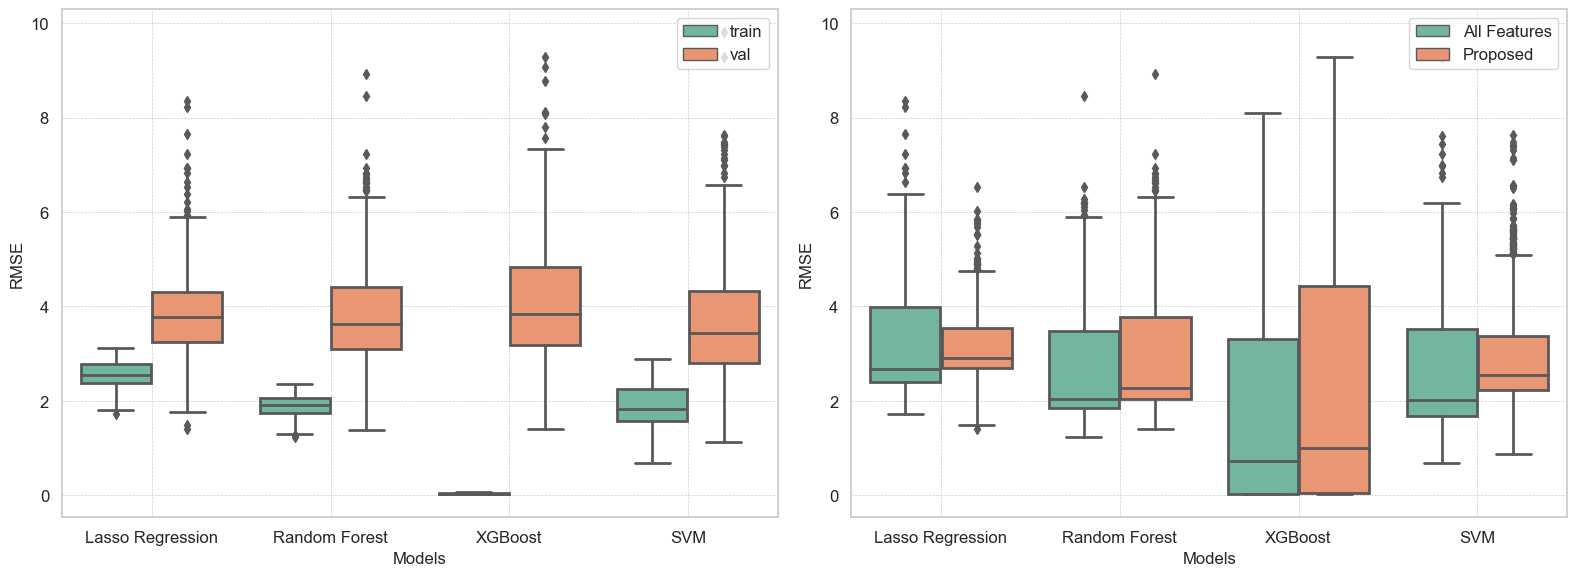

In [126]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Lasso Regression'})
    
    fig, axs = plt.subplots(1,2,figsize=(16, 6))
    # Set general style
    sns.set(style="whitegrid", font_scale=1.2)  # Scale font size
    
    # Draw the first boxplot with 'Dataset' (train/val) as the hue
    sns.boxplot(ax=axs[0], x='Model', y='RMSE', hue='Dataset', data=data, palette='Set2', linewidth=2)
    #axs[0].set_title('RMSE by Dataset', fontsize=16)
    axs[0].set_xlabel('Models', fontsize=12)
    axs[0].set_ylabel('RMSE', fontsize=12)
    axs[0].legend(fontsize=12, loc='upper right')

    # Draw the second boxplot with 'Feature Set' (All Features/Proposed) as the hue
    sns.boxplot(ax=axs[1], x='Model', y='RMSE', hue='Feature Set', data=data, palette='Set2', linewidth=2)
    #axs[1].set_title('RMSE by Feature Set', fontsize=16)
    axs[1].set_xlabel('Models', fontsize=12)
    axs[1].set_ylabel('RMSE', fontsize=12)
    axs[1].legend(fontsize=12, loc='upper right')

    # Add grid and adjust tick params for all subplots
    for ax in axs.flat:
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.1, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

    # Save figure
    plt.savefig('all56_vs_proposed9_bank_external_model.png', dpi=1000, bbox_inches='tight')
    #plt.savefig('all56_vs_proposed9_bank_internal_model.png', dpi=1000, bbox_inches='tight')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


# 調用函數來繪製 boxplot
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

#### Combined

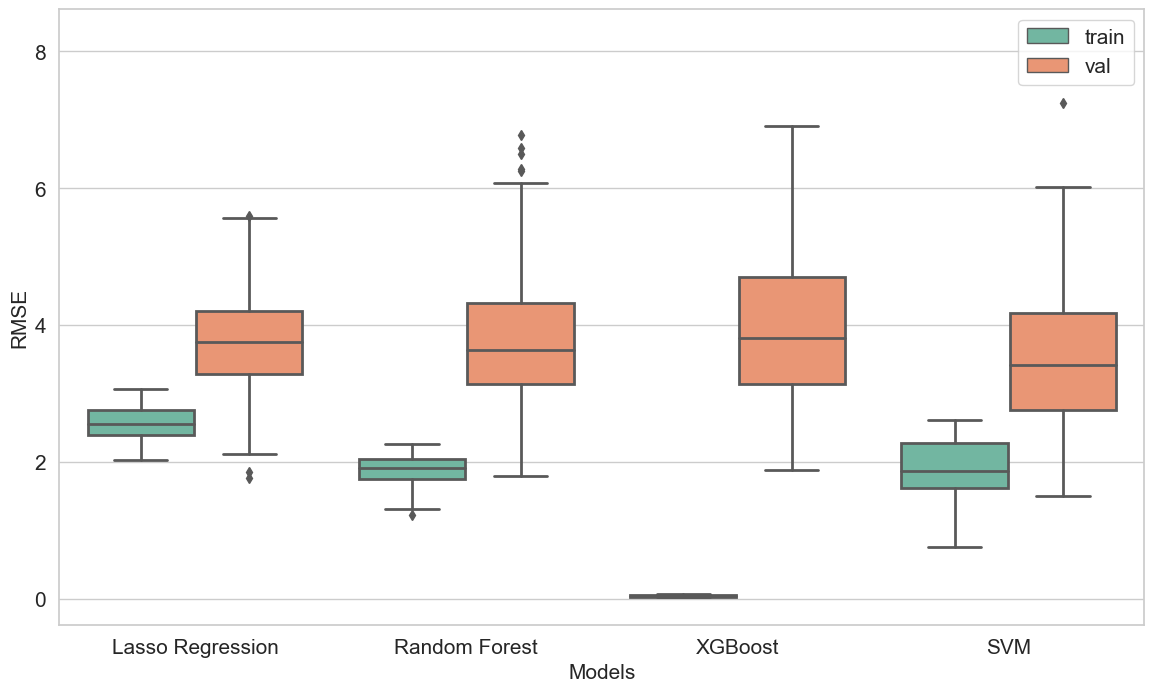

In [63]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Lasso Regression'})
    plt.figure(figsize=(14, 8))
    
    # Draw a boxplot with 'Dataset' (train/val) as the hue
    sns.boxplot(x='Model', y='RMSE', hue='Dataset', data=data, palette='Set2', linewidth=2)
    
    #plt.title('RMSE Comparison Across Models', fontsize=16)
    plt.xlabel('Models', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.xticks(fontsize = 15)#rotation=45, 
    plt.yticks(fontsize = 15)
    plt.legend(fontsize=15, loc='upper right')
    
    plt.show()
# 調用函數來繪製 boxplot
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

比模型
1. train set RMSE: LR>RF=SVM>XGB， val set沒有明顯差異
2. LR比機器學習最差

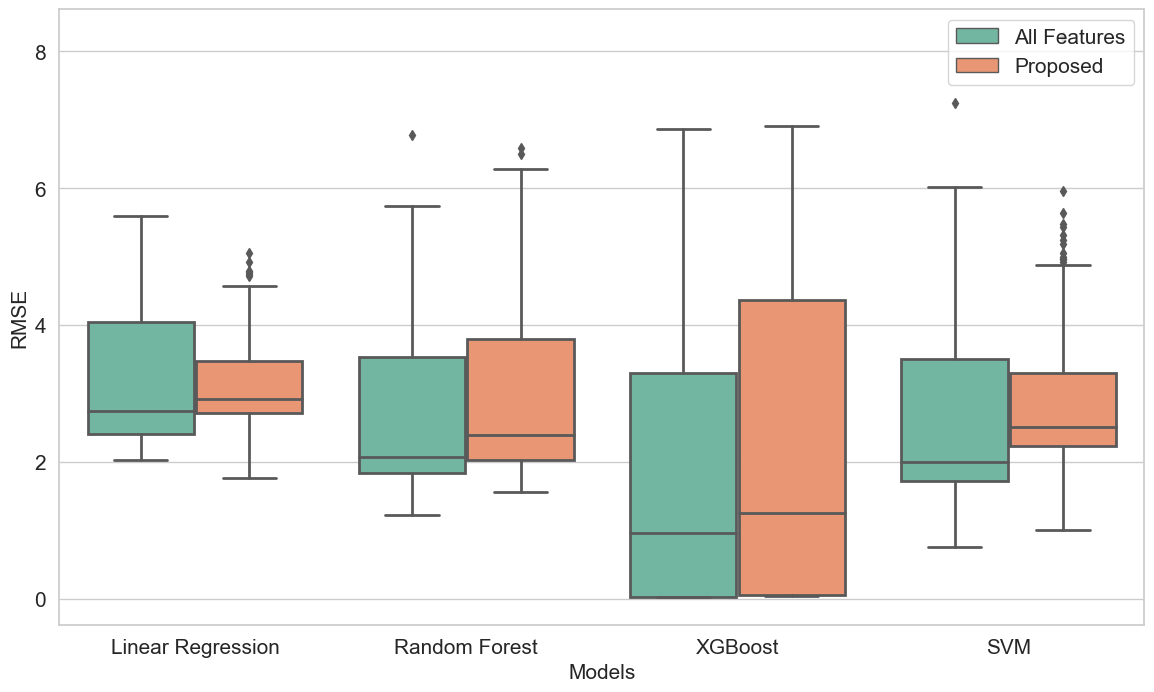

In [64]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    plt.figure(figsize=(14, 8))
    
    # Draw a boxplot with 'Dataset' (train/val) as the hue
    sns.boxplot(x='Model', y='RMSE', hue='Feature Set', data=data, palette='Set2', linewidth=2)
    
    #plt.title('RMSE Comparison Across Feature Sets', fontsize=16)
    plt.xlabel('Models', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.xticks(fontsize = 15)#rotation=45, 
    plt.yticks(fontsize = 15)
    plt.legend( fontsize=15, loc='upper right')
    #title='Dataset', title_fontsize=15,
    plt.show()

# 調用函數來繪製 boxplot
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

比features沒有顯著差異

#### Compare features and models

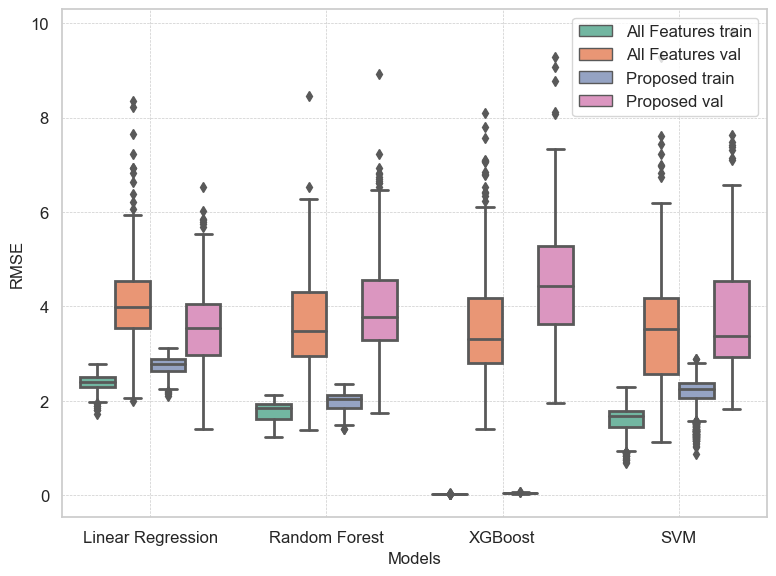

In [127]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    
    # Combine Dataset and Feature Set into a single column to create distinct categories for boxplots
    data['Feature_Dataset'] = data['Feature Set'] + ' ' + data['Dataset']
    
    plt.figure(figsize=(8, 6))#14, 8
    sns.set(style="whitegrid", font_scale=1.2)  # Scale font size
    
    # Draw a boxplot with combined 'Feature Set' and 'Dataset' for x-axis grouping
    sns.boxplot(x='Model', y='RMSE', hue='Feature_Dataset', data=data, palette='Set2', linewidth=2)
    # Add gridlines
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, axis='both')
    
    #plt.title('RMSE Comparison Across Models and Feature Sets', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(fontsize=12, loc='upper right')

    # Save figure
    plt.savefig('all56_vs_proposed9_bank_external_model&feature.png', dpi=1000, bbox_inches='tight')
    #plt.savefig('all56_vs_proposed9_bank_internal_model&feature.png', dpi=1000, bbox_inches='tight')
   
    # Adjust layout and display the plot
    plt.tight_layout()    
    plt.show()

# Call the function to plot the boxplot comparison
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

比features
1. val dataset, RMSE lasso ols feature<<all features誤差顯著下降至和其他機器模型相當，其他模型用挑過變數(9)結果相當
2. train dataset, RMSE ols feature誤差顯著上升，樹狀不變

#### Compare features

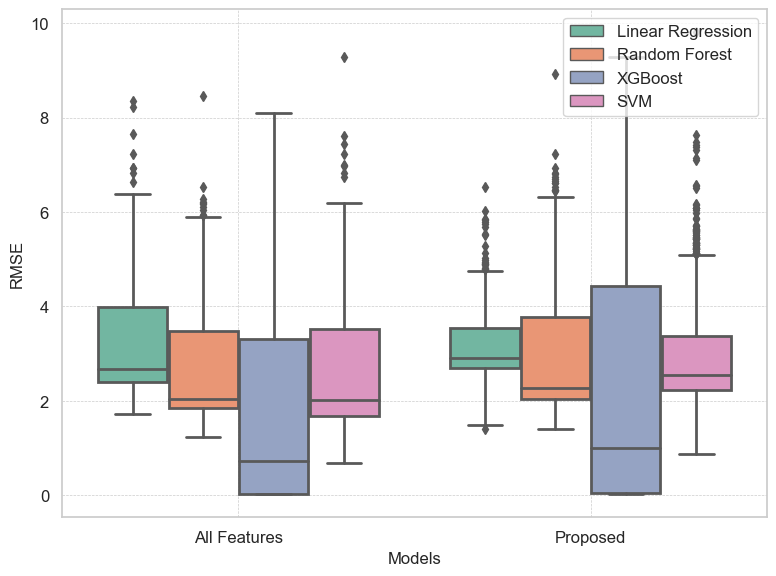

In [128]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    
    # Combine Dataset and Feature Set into a single column to create distinct categories for boxplots
    data['Feature_Dataset'] = data['Feature Set'] + ' ' + data['Dataset']
    
    plt.figure(figsize=(8, 6))#14, 8
    sns.set(style="whitegrid", font_scale=1.2)  # Scale font size
       
    # Draw a boxplot with combined 'Feature Set' and 'Dataset' for x-axis grouping
    sns.boxplot(x='Feature Set', y='RMSE', hue='Model', data=data, palette='Set2', linewidth=2)
    # Add gridlines
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, axis='both')
     
    #plt.title('RMSE Comparison Across Models and Feature Sets', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.xticks(fontsize = 12) 
    plt.yticks(fontsize = 12)
    plt.legend(fontsize=12, loc='upper right')

    # Save figure
    plt.savefig('all56_vs_proposed9_bank_external_feature.png', dpi=1000, bbox_inches='tight')
    #plt.savefig('all56_vs_proposed9_bank_internal_feature.png', dpi=1000, bbox_inches='tight')
   
    # Adjust layout and display the plot
    plt.tight_layout()     
    plt.show()

# Call the function to plot the boxplot comparison
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)

比features沒有顯著差異

#### 沒放TBD沒放TBD

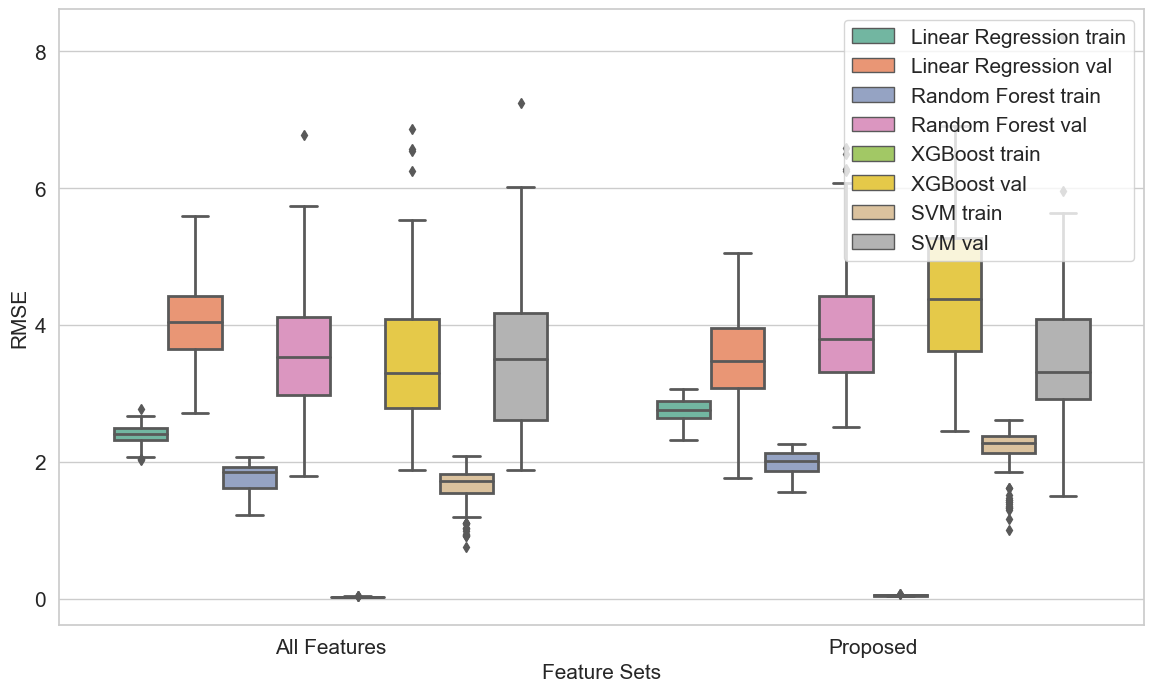

In [67]:
def plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols):
    # Prepare the data for the boxplot
    data = prepare_boxplot_data(rmse_dict_all, rmse_dict_ols)
    data['Model'] = data['Model'].replace({'Lasso': 'Linear Regression'})
    
    # Combine Dataset and Feature Set into a single column to create distinct categories for boxplots
    data['Model_Dataset'] = data['Model'] + ' ' + data['Dataset']
    
    plt.figure(figsize=(14, 8))
    
    # Draw a boxplot with combined 'Feature Set' and 'Dataset' for x-axis grouping
    sns.boxplot(x='Feature Set', y='RMSE', hue='Model_Dataset', data=data, palette='Set2', linewidth=2)
    
    #plt.title('RMSE Comparison Across Models and Feature Sets', fontsize=16)
    plt.xlabel('Feature Sets', fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.xticks(fontsize = 15)#rotation=45, 
    plt.yticks(fontsize = 15)
    plt.legend(fontsize=15, loc='upper right')
    
    plt.show()

# Call the function to plot the boxplot comparison
plot_boxplot_comparison(rmse_dict_all, rmse_dict_ols)